# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


In [1]:
import random
import datetime
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import Counter
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import RFECV, SelectKBest, chi2
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
recall_score, roc_curve, roc_auc_score, auc


# Question 1 : Factors that impact salary

## 1.1. Data Cleaning and EDA

In [2]:
df = pd.read_csv("./datasets/MyCareersFuture_All_Jobs.csv")

In [3]:
df.shape

(4735, 15)

In [4]:
df.head(2)

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement
0,https://www.mycareersfuture.sg/job/data-scient...,JOB-2019-0096282,Data Scientist,PANASONIC ASIA PACIFIC PTE. LTD.,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"Executive, Junior Executive",None,"$3,000to$4,600",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,IT Consultant (Data Scientist) The Role IT Co...,"Desired Skills, Competencies and Personal Trai..."
1,https://www.mycareersfuture.sg/job/data-center...,JOB-2019-0096030,Data Center Electrical Engineer - Singapore,GOOGLE ASIA PACIFIC PTE. LTD.,"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",Full Time,Senior Executive,6 years exp,"$10,750to$21,500",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,Company overview: Google is not a conventional...,Minimum qualifications: - Bachelor's degree in...


In [5]:
df.tail(2)

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement
4733,https://www.mycareersfuture.sg/job/mha-science...,JOB-2018-0204043,MHA Science & Technology Associate Programme,Ministry of Home Affairs,"NEW PHOENIX PARK, 28 IRRAWADDY ROAD 329560",Full Time,Fresh/entry level,None,None,NaN,0 application,Posted 29 Oct 2018,Closing on 28 Jun 2019,MHA S&T Associate Programme The Ministry of Ho...,None
4734,https://www.mycareersfuture.sg/job/business-an...,JOB-2018-0124564,Business Analyst (Data Analytics),GOVERNMENT TECHNOLOGY AGENCY,"MAPLETREE BUSINESS CITY, 10 PASIR PANJANG ROAD...",Full Time,Professional,None,None,NaN,0 application,Posted 09 Jul 2018,Closing on 08 Jul 2019,BAF (Data Analytics) We are looking for Busine...,None


In [6]:
df.duplicated().sum()

0

### 1.1.1 Splitting min salary and max salary

In [7]:
df['min_salary'] = df.salary_range.apply(lambda x: np.nan if x.split("to")[0]=="None" 
                                         else int(x.split("to")[0].split("$")[1].replace(",","")))

In [8]:
for i in range(0,df.shape[0]):
    try:
        df.loc[i,"max_salary"] = int(df.salary_range[i].split("to")[1].split("$")[1].replace(",",""))
    except:
        df.loc[i,"max_salary"] = np.nan
        

In [9]:
#df.drop("salary_range", axis=1, inplace=True)

In [10]:
df.shape

(4735, 17)

In [11]:
df.head(2)

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary
0,https://www.mycareersfuture.sg/job/data-scient...,JOB-2019-0096282,Data Scientist,PANASONIC ASIA PACIFIC PTE. LTD.,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"Executive, Junior Executive",None,"$3,000to$4,600",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,IT Consultant (Data Scientist) The Role IT Co...,"Desired Skills, Competencies and Personal Trai...",3000.0,4600.0
1,https://www.mycareersfuture.sg/job/data-center...,JOB-2019-0096030,Data Center Electrical Engineer - Singapore,GOOGLE ASIA PACIFIC PTE. LTD.,"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",Full Time,Senior Executive,6 years exp,"$10,750to$21,500",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,Company overview: Google is not a conventional...,Minimum qualifications: - Bachelor's degree in...,10750.0,21500.0


In [12]:
df.isnull().sum()

url                  0
id                   0
title                0
company              0
location             0
employment_type      0
seniority           90
min_experience       0
salary_range         0
salary_type        644
no_applicants        0
posted_date          0
closing_date         0
description          0
requirement          0
min_salary         657
max_salary         657
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 17 columns):
url                4735 non-null object
id                 4735 non-null object
title              4735 non-null object
company            4735 non-null object
location           4735 non-null object
employment_type    4735 non-null object
seniority          4645 non-null object
min_experience     4735 non-null object
salary_range       4735 non-null object
salary_type        4091 non-null object
no_applicants      4735 non-null object
posted_date        4735 non-null object
closing_date       4735 non-null object
description        4735 non-null object
requirement        4735 non-null object
min_salary         4078 non-null float64
max_salary         4078 non-null float64
dtypes: float64(2), object(15)
memory usage: 628.9+ KB


### 1.1.2 Checking duplicates

In [14]:
df.shape

(4735, 17)

In [15]:
# checking duplicated in whole dataframe
df.duplicated().value_counts()

False    4735
dtype: int64

In [16]:
# Checking again with url and id columns, probably these two columns have unique values 
# which cause showing no duplication.
df.drop(['url','id'],axis=1).duplicated().value_counts()

False    4693
True       42
dtype: int64

In [17]:
df[df.drop(['url','id'],axis=1).duplicated()==True].index

Int64Index([   5,    6,   57,  279,  359,  555,  850,  919, 1331, 1744, 1794,
            2040, 2085, 2261, 2263, 2382, 2602, 2616, 2687, 2775, 2776, 2827,
            2969, 2971, 2974, 2975, 2977, 2980, 2981, 2983, 2984, 2985, 3195,
            3196, 3198, 3199, 3248, 3341, 3398, 4090, 4092, 4669],
           dtype='int64')

In [18]:
# Removing duplicates because the agency/company are promoting the same job more than 
# one time because probably they require more than 1 person in that same position.
df.drop(df[df.drop(['url','id'],axis=1).duplicated()==True].index,inplace=True)

In [19]:
df.shape

(4693, 17)

### 1.1.3 Converting min experience to integer

In [20]:
df.min_experience = df.min_experience.apply(lambda x : "None" if x=="None" else int(x.split(" ")[0]))

In [21]:
df.head(2)

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary
0,https://www.mycareersfuture.sg/job/data-scient...,JOB-2019-0096282,Data Scientist,PANASONIC ASIA PACIFIC PTE. LTD.,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"Executive, Junior Executive",None,"$3,000to$4,600",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,IT Consultant (Data Scientist) The Role IT Co...,"Desired Skills, Competencies and Personal Trai...",3000.0,4600.0
1,https://www.mycareersfuture.sg/job/data-center...,JOB-2019-0096030,Data Center Electrical Engineer - Singapore,GOOGLE ASIA PACIFIC PTE. LTD.,"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",Full Time,Senior Executive,6,"$10,750to$21,500",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,Company overview: Google is not a conventional...,Minimum qualifications: - Bachelor's degree in...,10750.0,21500.0


### 1.1.4 Removing unrelated jobs

In [22]:
# Checking how many unique job title there is - Method 1
len(df.title.unique())

3359

In [23]:
# Checking how many unique job title there is - Method 2
df.title.nunique()

3359

In [24]:
df.title.value_counts()

Data Scientist                                                               47
Accounts Assistant                                                           40
Accounts Executive                                                           33
Data Engineer                                                                29
Research Fellow                                                              28
Accountant                                                                   28
Research Associate                                                           23
Software Engineer                                                            21
Business Analyst                                                             19
Administrative Assistant                                                     18
Finance Manager                                                              18
Product Manager                                                              18
Project Manager                         

In [25]:
df[df.title=='Brand Manager'].head()

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary
1385,https://www.mycareersfuture.sg/job/brand-manag...,JOB-2019-0089781,Brand Manager,AGAPE STUDENT CARE CENTRE,None,"Permanent, Full Time",Manager,None,None,NaN,0 application,Posted 26 Apr 2019,Closing on 26 May 2019,"To develop and lead annual brand strategy, an...",Minimum bachelor’s degree in business or mark...,NaN,NaN
1392,https://www.mycareersfuture.sg/job/brand-manag...,JOB-2019-0089489,Brand Manager,AGAPE LITTLE UNI.@GAMBAS PTE. LTD.,None,"Permanent, Full Time",Manager,None,None,NaN,0 application,Posted 26 Apr 2019,Closing on 26 May 2019,"To develop and lead annual brand strategy, an...",Minimum bachelor’s degree in business or mark...,NaN,NaN
1396,https://www.mycareersfuture.sg/job/brand-manag...,JOB-2019-0089279,Brand Manager,AGAPE LITTLE UNI.@UPPER SERANGOON PTE. LTD.,None,"Permanent, Full Time",Manager,None,None,NaN,3 applications,Posted 26 Apr 2019,Closing on 26 May 2019,"To develop and lead annual brand strategy, an...",Minimum bachelor’s degree in business or mark...,NaN,NaN
1836,https://www.mycareersfuture.sg/job/brand-manag...,JOB-2019-0087724,Brand Manager,A_DREAM ACADEMY PTE. LTD.,None,"Permanent, Full Time",Manager,None,None,NaN,6 applications,Posted 24 Apr 2019,Closing on 24 May 2019,"To develop and lead annual brand strategy, an...",Minimum bachelor’s degree in business or mark...,NaN,NaN
1842,https://www.mycareersfuture.sg/job/brand-manag...,JOB-2019-0087543,Brand Manager,AGAPE LITTLE UNI. @ COMPASSVALE PTE. LTD.,None,"Permanent, Full Time",Manager,None,None,NaN,1 application,Posted 24 Apr 2019,Closing on 24 May 2019,"To develop and lead annual brand strategy, an...",Minimum bachelor’s degree in business or mark...,NaN,NaN


In [26]:
df[df.title=='Brand Manager']['description'][1385]

" To develop and lead annual brand strategy, and to execute customer-driven, locally oriented end-to-end marketing programs to increase customer demand. To plan and execute marketing campaigns to meet business goals, in alignment with the company’s business/marketing strategy and direction. Set objectives, strategies, tactics and targets for all elements of the marketing mix. Agency management and content creation e.g. digital, events, media/public relations, social media, sales programs. Monthly reporting, communicating Marketing’s impact to key stakeholders, with actionable insights. Build and maintain relationships with cross-functional teams for project collaboration and to develop top strategies for the brand's success. Initiate research projects to generate consumer data and to derive insights from such data, which will enable brand leaders to set the direction for brand growth and evolve marketing tactics as required. Explore new ways to improve the company’s services, to increa

In [27]:
df[df.title=='Brand Manager']['requirement'][1385]

' Minimum bachelor’s degree in business or marketing (MBA or Masters’ degree in marketing will be a plus) 3 to 4 years of relevant work experience to show past success in marketing campaigns and coordinating team efforts Excellent written and oral communication skills Strong interpersonal skills, including the ability to influence across the organisation and externally High analytical thinking, innovation, creativity and project management skills Good organisational and planning skills, and experience in managing projects from start to finish, with demonstrable experience of successful prioritisation and allocation of resources. Proven experience working with social media platforms, such as Facebook, LinkedIn, Twitter Trend savviness to stay on top of industry trends in marketing Excellent presentation skills '

In [28]:
# Creating bag of words and getting the related jobs by filtering in requirement column
bag_of_words = 'Machine Learning|machine learning|NLP|nlp|SQL|sql|Data Science| \
data science|Big Data|big data|Python|python|statistical test|Artificial Intelligence|AI|\
artificial intelligence|Deep Learning|deep learning|tableau|Tableau|Neural Network|\
neural network|statistics|analytics'
df[df.requirement.str.contains(bag_of_words)].count()

url                1272
id                 1272
title              1272
company            1272
location           1272
employment_type    1272
seniority          1272
min_experience     1272
salary_range       1272
salary_type        1185
no_applicants      1272
posted_date        1272
closing_date       1272
description        1272
requirement        1272
min_salary         1185
max_salary         1185
dtype: int64

In [29]:
# Removing the unrelated job from my Dataframe
df = df[df.requirement.str.contains(bag_of_words)]
df.shape

(1272, 17)

In [30]:
# Checking again how many unique job titles are left
df.title.nunique()

920

### 1.1.5 Checking null values and removing it

In [31]:
# Checking how many null values in each columns
df.isnull().sum()

url                 0
id                  0
title               0
company             0
location            0
employment_type     0
seniority           0
min_experience      0
salary_range        0
salary_type        87
no_applicants       0
posted_date         0
closing_date        0
description         0
requirement         0
min_salary         87
max_salary         87
dtype: int64

In [32]:
# Checking the null values of min_salary. Most likely if salary range is not 
# provided, salary type will not be provided too. Definitely min_salary and max_salary 
# will be Null value since salary range is none.
df[df.min_salary.isnull()].head()

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary
10,https://www.mycareersfuture.sg/job/senior-anal...,JOB-2019-0096078,"Senior Analyst, Workforce Planning and Compens...",VERTIV (SINGAPORE) PTE. LTD.,"NEW TECH PARK, 151 LORONG CHUAN 556741",Contract,"Manager, Professional",5,None,NaN,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,"Reporting to the Vice President, Human Resourc...",Requirements: We are looking for self-motivat...,NaN,NaN
65,https://www.mycareersfuture.sg/job/marketing-p...,JOB-2019-0095993,Marketing and Partnerships Manager - Loyalty I...,CAREER CONNECT CONSULTANCY,None,"Permanent, Full Time",Professional,2,None,NaN,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,"Develop digital marketing campaigns (search, ...",2-5 years of related digital marketing or rel...,NaN,NaN
145,https://www.mycareersfuture.sg/job/risk-analys...,JOB-2019-0095147,Risk Analyst-Contract (Market & Credit Risk team),UNILITE RECRUITMENT SERVICES PTE. LTD.,"SUNTEC TOWER TWO, 9 TEMASEK BOULEVARD 038989","Contract, Full Time","Executive, Senior Executive",2,None,NaN,2 applications,Posted 06 May 2019,Closing on 05 Jun 2019,Assist the department in navigating the digit...,"Bachelor's degree in Financial engineering, e...",NaN,NaN
178,https://www.mycareersfuture.sg/job/manager-ret...,JOB-2019-0095313,"Manager, Retailer Vertical",THE NIELSEN COMPANY (SINGAPORE) PTE. LTD.,"GOLDBELL TOWERS, 47 SCOTTS ROAD 228233",Permanent,Manager,3,None,NaN,0 application,Posted 06 May 2019,Closing on 05 Jun 2019,Working with the team to own full client serv...,"At least a Bachelor’s Degree, in any discipli...",NaN,NaN
179,https://www.mycareersfuture.sg/job/e-commerce-...,JOB-2019-0095312,E-Commerce Business Development Manager (Japan...,SNAPHUNT PTE. LTD.,"ONE RAFFLES PLACE, 1 RAFFLES PLACE 048616","Permanent, Full Time","Senior Management, Middle Management, Manager,...",3,None,NaN,0 application,Posted 06 May 2019,Closing on 05 Jun 2019,The Offer Opportunity within a company with a...,The Profile You possess a minimum of JLPT N1 ...,NaN,NaN


In [33]:
# Dropping nan values from dataframe
df.dropna(axis=0,inplace=True)

In [34]:
# Checking size of dataframe again after removing.
df.shape

(1185, 17)

In [35]:
# Double checking if any nan value is left to clear.
df.isnull().sum()

url                0
id                 0
title              0
company            0
location           0
employment_type    0
seniority          0
min_experience     0
salary_range       0
salary_type        0
no_applicants      0
posted_date        0
closing_date       0
description        0
requirement        0
min_salary         0
max_salary         0
dtype: int64

### 1.1.6 Checking salary if it's annually or monthly. If annually, convert it to monthly.

In [36]:
df.salary_type.unique()

array(['Monthly', 'Annually'], dtype=object)

In [37]:
df.salary_type.value_counts()

Monthly     1118
Annually      67
Name: salary_type, dtype: int64

In [38]:
df[df.salary_type=='Annually']['min_salary'].index

Int64Index([  38,   88,   90,   91,  117,  124,  161,  195,  197,  227,  246,
             276,  314,  423,  513,  670,  689,  846, 1066, 1104, 1166, 1233,
            1262, 1286, 1405, 1419, 1456, 1461, 1578, 1602, 1756, 1780, 1786,
            1806, 1819, 1829, 1838, 1879, 1882, 1963, 1964, 2013, 2018, 2278,
            2374, 2401, 2485, 2526, 2568, 2814, 2845, 2859, 2903, 3006, 3109,
            3344, 3419, 3463, 3580, 3819, 4050, 4065, 4066, 4075, 4121, 4235,
            4434],
           dtype='int64')

In [39]:
df.loc[df[df.salary_type=='Annually']['min_salary'].index,'min_salary'] = df[df.salary_type=='Annually']['min_salary']/12
print(df[df.salary_type=='Annually']['min_salary'].head())

df.loc[df[df.salary_type=='Annually']['max_salary'].index,'max_salary'] = df[df.salary_type=='Annually']['max_salary']/12
print(df[df.salary_type=='Annually']['max_salary'].head())


38     16666.666667
88     10833.333333
90     10833.333333
91     10833.333333
117    10833.333333
Name: min_salary, dtype: float64
38     22916.666667
88     20833.333333
90     20833.333333
91     22083.333333
117    21666.666667
Name: max_salary, dtype: float64


In [40]:
df[df.salary_type=='Annually'].head()

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary
38,https://www.mycareersfuture.sg/job/senior-prog...,JOB-2019-0096297,Senior Program Manager,AMAZON ASIA-PACIFIC HOLDINGS PRIVATE LIMITED,"AIA TOWER, 1 ROBINSON ROAD 048542",Full Time,Middle Management,8,"$200,000to$275,000",Annually,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,"Amazon is looking for a talented, customer-obs...",Basic qualifications Bachelor’s degree in Busi...,16666.666667,22916.666667
88,https://www.mycareersfuture.sg/job/big-data-so...,JOB-2019-0008140,Big Data Solutions Architect,AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED,"AIA TOWER, 1 ROBINSON ROAD 048542",Permanent,Professional,10,"$130,000to$250,000",Annually,9 applications,Posted 06 May 2019,Closing on 05 Jun 2019,Amazon Web Services (AWS) is looking for an ex...,Basic Qualifications: Deep understanding of ...,10833.333333,20833.333333
90,https://www.mycareersfuture.sg/job/big-data-so...,JOB-2019-0095700,Big Data Solutions Architect,AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED,"AIA TOWER, 1 ROBINSON ROAD 048542",Permanent,Professional,10,"$130,000to$250,000",Annually,0 application,Posted 06 May 2019,Closing on 05 Jun 2019,Amazon Web Services (AWS) is looking for an ex...,Basic Qualifications: Deep understanding of ...,10833.333333,20833.333333
91,https://www.mycareersfuture.sg/job/specialist-...,JOB-2019-0095680,Specialist Solutions Architect - Data Warehouse,AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED,"AIA TOWER, 1 ROBINSON ROAD 048542",Permanent,Professional,12,"$130,000to$265,000",Annually,0 application,Posted 06 May 2019,Closing on 05 Jun 2019,Are you a Data Warehousing specialist? Do you ...,Basic qualifications 7 or more years of expe...,10833.333333,22083.333333
117,https://www.mycareersfuture.sg/job/solutions-a...,JOB-2019-0039613,Solutions Architect,AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED,"AIA TOWER, 1 ROBINSON ROAD 048542",Permanent,Professional,8,"$130,000to$260,000",Annually,9 applications,Posted 06 May 2019,Closing on 05 Jun 2019,Are you a Big Data specialist? Do you have Dat...,Basic qualifications Deep understanding of Ap...,10833.333333,21666.666667


### 1.1.7 Checking salary < 1500 and remove if existed

In [41]:
# checking descriptive statistic for numeric data
df.describe()

,min_salary,max_salary
count,1185.000000,1185.000000
mean,5707.776371,9148.411814
std,4657.819830,8687.368694
min,1.000000,7.000000
25%,4000.000000,6000.000000
50%,5000.000000,8000.000000
75%,7000.000000,10500.000000
max,140000.000000,240000.000000


In [42]:
# since minimum of salary is found out as 1 which is not resonable, let's find out how
# many rows are there less than 1500
df[df.min_salary<1500]

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary
952,https://www.mycareersfuture.sg/job/engineering...,JOB-2019-0059619,Engineering Manager,ISENTIA BRANDTOLOGY PTE. LTD.,"LUZERNE, 70 BENDEMEER ROAD 339940",Permanent,Manager,6,"$1to$13,000",Monthly,8 applications,Posted 30 Apr 2019,Closing on 30 May 2019,"Why Isentia? Our engineers are curious, self-s...",Requirements: Experience building and leading...,1.0,13000.0
1482,https://www.mycareersfuture.sg/job/master-thes...,JOB-2019-0089315,Master Thesis – Mathematical Programming Model...,TUM CREATE LIMITED,1 CREATE WAY 138602,Internship,Fresh/entry level,None,"$1,000to$2,000",Monthly,1 application,Posted 26 Apr 2019,Closing on 26 May 2019,Introduction TUMCREATE is a leading research i...,Mandatory Requirements Master/Bachelor Degree...,1000.0,2000.0
2771,https://www.mycareersfuture.sg/job/assistant-l...,JOB-2019-0041918,Assistant Laboratory Officer / Laboratory Offi...,A*STAR RESEARCH ENTITIES,"UOB PLAZA, 80 RAFFLES PLACE 048624","Contract, Full Time",Non-executive,None,"$1,000to$3,000",Monthly,5 applications,Posted 18 Apr 2019,Closing on 18 May 2019,"The Agency for Science, Technology and Researc...",Higher Nitec / Diploma in Business/Administra...,1000.0,3000.0
4167,https://www.mycareersfuture.sg/job/part-time-a...,JOB-2019-0075668,PART TIME ACCOUNT CLERK,LKS MANAGEMENT PTE. LTD.,123 BUKIT MERAH LANE 1 150123,"Permanent, Flexi work",Non-executive,None,$6to$7,Monthly,7 applications,Posted 10 Apr 2019,Closing on 10 May 2019,PART TIMER OFFICE ENVIRONMENTAL ADMIN & ACCOUN...,WELCOME STUDENT & SENIOR CITIZEN $6 PER HOUR W...,6.0,7.0
4196,https://www.mycareersfuture.sg/job/quantitativ...,JOB-2019-0027189,quantitative researcher,HARVESTON ASSET MANAGEMENT PTE. LTD.,"GB BUILDING, 143 CECIL STREET 069542",Full Time,Executive,None,"$1,000to$100,000",Monthly,31 applications,Posted 10 Apr 2019,Closing on 10 May 2019,The company is a leading strategic investment ...,"Requirements · Degree in Mathematics, ...",1000.0,100000.0


In [43]:
df[df.min_salary<1500]['requirement'][952]

'Requirements:  Experience building and leading engineering teams (6-12 engineers) in a fast-paced environment Experience leading delivery using an agile approach\xa0preferably squad and tribe model \xa0Experience with real-world microservices architecture\xa0and/or real-time data processing pipelines Hands-on coding experience with any of the\xa0following programming\xa0languages\xa0- Java,\xa0JavaScript, Python, C#, or Go. Good\xa0exposure to various AWS services including but\xa0not limited to DynamoDB, EC2, Lambda. Understanding of\xa0 continuous integration\xa0(CI) and\xa0continuous delivery (CD) principals is highly\xa0desirable Desirable\xa0experience with containers( Kubernetese &\xa0Docker), or big data frameworks (Storm & Spark) desirable\xa0  More about you:  You are a technical lead looking to step up or engineering manager interested\xa0in a more challenging opportunity You enjoy leading and managing high-performing teams and you love to bring best out of engineers\xa0 You

In [44]:
# Dropping the rows if the minimum salary is lower than 1500 because some company provided
# unusable range of salary to attract candidates and some are internship position even
# the requirement includeds degeree or diploma. Setting min salary above 1500 is resonable
# due to diploma holder consisderation.
df.drop(df[df.min_salary<1500].index, axis=0,inplace=True)

In [45]:
# Checking min and max of salary again
df.describe()

,min_salary,max_salary
count,1180.000000,1180.000000
mean,5729.413559,9087.170339
std,4655.666666,8284.138979
min,1500.000000,2000.000000
25%,4000.000000,6000.000000
50%,5000.000000,8000.000000
75%,7000.000000,10500.000000
max,140000.000000,240000.000000


In [46]:
# Double checking
df[df.min_salary<1500]

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary


In [47]:
#df[(df.max_salary-df.min_salary) > 8000]

### 1.1.8 Checking if employment_type should be used as features

In [48]:
df.employment_type.value_counts()

Full Time                                                          459
Permanent                                                          272
Permanent, Full Time                                               208
Contract, Full Time                                                111
Contract                                                            87
Permanent, Contract, Full Time                                      16
Permanent, Contract                                                 14
Full Time, Internship                                                4
Internship                                                           3
Temporary, Full Time                                                 1
Temporary                                                            1
Part Time, Permanent, Temporary, Contract, Freelance, Full Time      1
Temporary, Contract, Full Time                                       1
Full Time, Flexi work                                                1
Tempor

In [49]:
# Just checking what are in stopwords
stopping_words = stopwords.words('english')
print("Checking what words are contained in stopwords :\n",stopping_words)

Checking what words are contained in stopwords :
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'n

In [50]:
stopping_words.extend(['time','work'])

cvec = CountVectorizer(stop_words='english')
cvec = CountVectorizer(stop_words=stopping_words)

cvec.fit(df.employment_type)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',...uldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'time', 'work'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [51]:
print("# of features : {}".format(len(cvec.get_feature_names())))

employment_type_df = pd.DataFrame(cvec.transform(df.employment_type).todense(),
                                  columns=cvec.get_feature_names())

employment_type_df.shape

# of features : 8


(1180, 8)

In [52]:
employment_type_df.head()

,contract,flexi,freelance,full,internship,part,permanent,temporary
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [53]:
employment_type_df.sum()

contract      231
flexi           1
freelance       1
full          802
internship      7
part            1
permanent     511
temporary       5
dtype: int64

In [54]:
employment_type_df['min_salary'] = df.min_salary

In [55]:
employment_type_df.columns

Index(['contract', 'flexi', 'freelance', 'full', 'internship', 'part',
       'permanent', 'temporary', 'min_salary'],
      dtype='object')

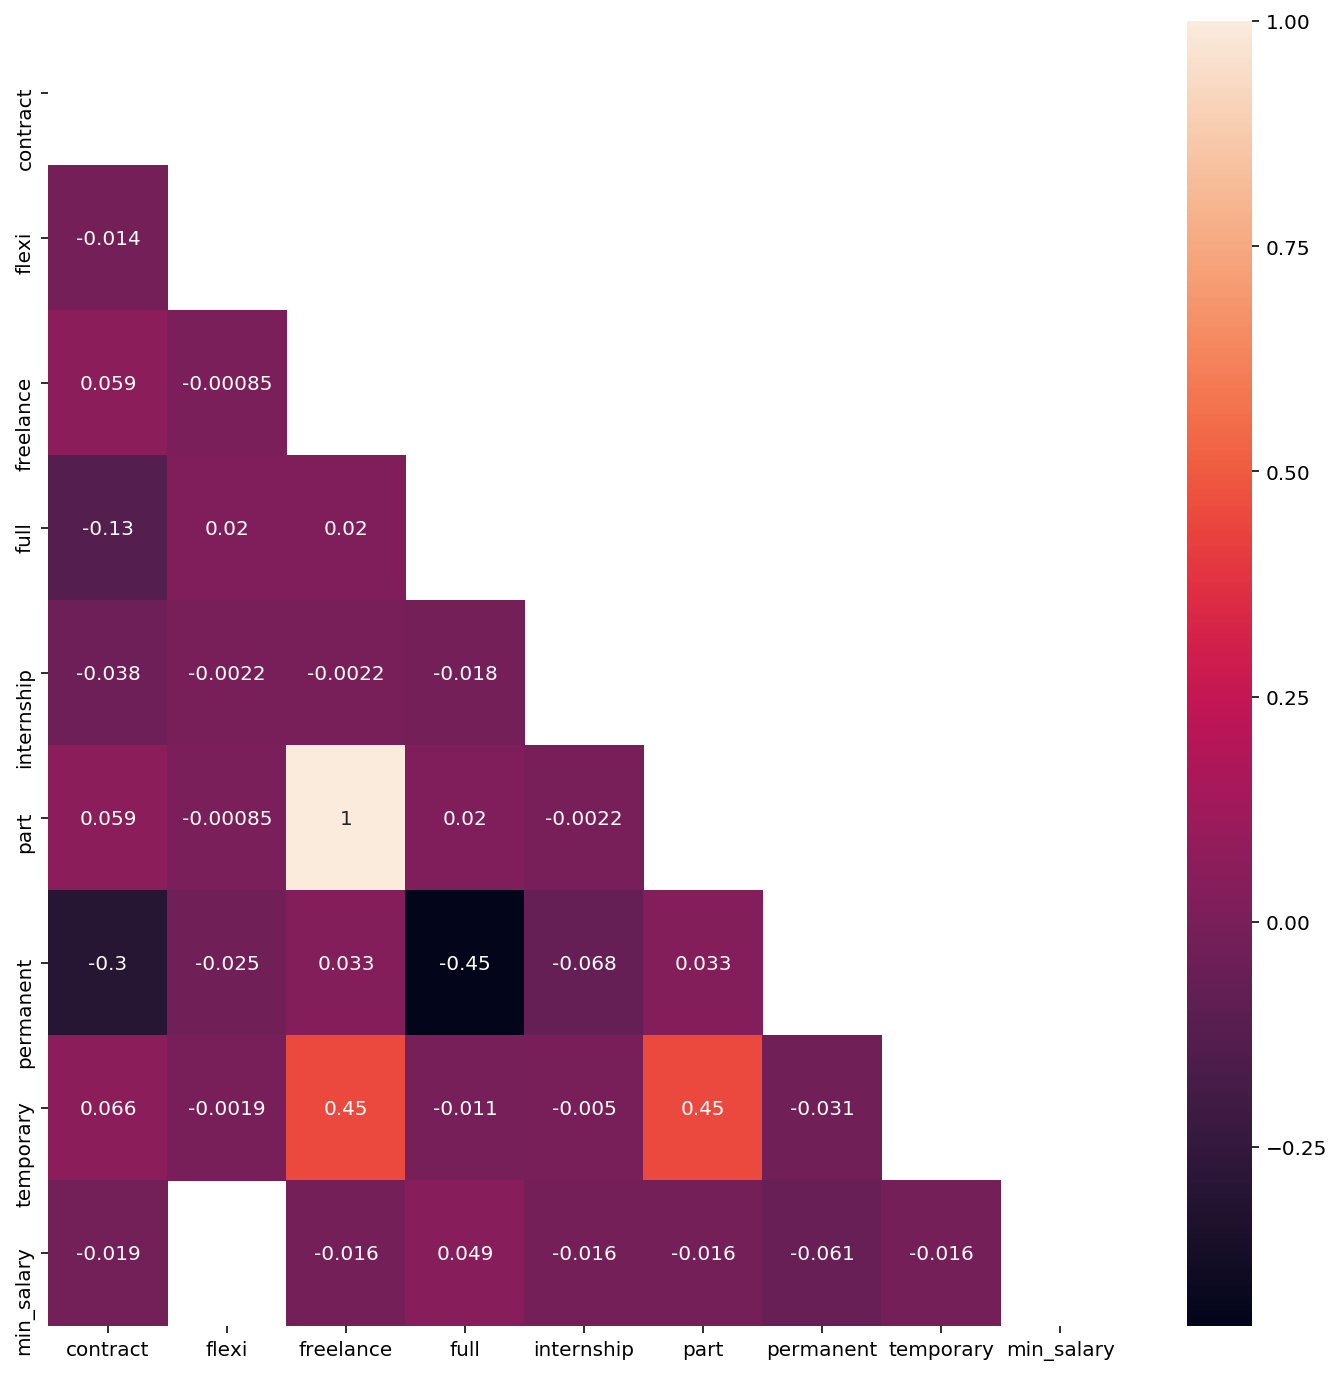

In [56]:
plt.figure(figsize=(12,12))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(employment_type_df.corr(), dtype = np.bool )
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.heatmap(employment_type_df.corr( ), mask=mask, annot=True )

#### It found out that employment type is not correlated at all. Therefore, it wouldn't be used as features.

### 1.1.9 Processing seniority to be used as features

In [57]:
df.head()

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary
0,https://www.mycareersfuture.sg/job/data-scient...,JOB-2019-0096282,Data Scientist,PANASONIC ASIA PACIFIC PTE. LTD.,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"Executive, Junior Executive",None,"$3,000to$4,600",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,IT Consultant (Data Scientist) The Role IT Co...,"Desired Skills, Competencies and Personal Trai...",3000.0,4600.0
4,https://www.mycareersfuture.sg/job/senior-data...,JOB-2019-0096069,Senior Database Consultant - Big Data Engineer,PALO IT SINGAPORE PTE. LTD.,51B CIRCULAR ROAD 049406,"Permanent, Full Time",Professional,3,"$6,000to$12,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,Your profile & role on the project YOU: Thriv...,"✔ You hold a Bachelor, Master or PhD degre...",6000.0,12000.0
8,https://www.mycareersfuture.sg/job/mis-executi...,JOB-2019-0096039,MIS EXECUTIVE,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,"Fresh/entry level, Executive",1,"$2,500to$3,500",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,The MIS Engineer will be responsible for admin...,Candidate must possess at least a Diploma/ De...,2500.0,3500.0
9,https://www.mycareersfuture.sg/job/embedded-so...,JOB-2019-0064241,Embedded Software Engineer,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,Executive,2,"$2,500to$3,000",Monthly,1 application,Posted 07 May 2019,Closing on 06 Jun 2019,Design of Webpage in Embedded Board using P...,Degree or Diploma in IT or other related disc...,2500.0,3000.0
11,https://www.mycareersfuture.sg/job/pre-sales-e...,JOB-2019-0096016,Pre Sales Engineer,NUMERIX SINGAPORE PTE. LTD.,None,Full Time,Junior Executive,2,"$4,000to$8,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,You will support the regional Sales Specialist...,"Qualifications: In addition, the candidate sh...",4000.0,8000.0


In [58]:
df.seniority.value_counts()

Professional                                                            319
Executive                                                               216
Senior Executive                                                        125
Manager                                                                 117
Non-executive                                                            72
Middle Management                                                        55
Senior Management                                                        51
Junior Executive                                                         50
Fresh/entry level                                                        36
Professional, Senior Executive                                           24
Professional, Executive                                                  16
Professional, Executive, Senior Executive                                13
Executive, Senior Executive                                              11
Executive, J

In [59]:
df.seniority.value_counts().shape

(43,)

In [60]:
def seniority_cleaning(string):
    return (string.split(', '))

In [61]:
df.seniority = df.seniority.apply(seniority_cleaning)

In [62]:
df.head()

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary
0,https://www.mycareersfuture.sg/job/data-scient...,JOB-2019-0096282,Data Scientist,PANASONIC ASIA PACIFIC PTE. LTD.,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"[Executive, Junior Executive]",None,"$3,000to$4,600",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,IT Consultant (Data Scientist) The Role IT Co...,"Desired Skills, Competencies and Personal Trai...",3000.0,4600.0
4,https://www.mycareersfuture.sg/job/senior-data...,JOB-2019-0096069,Senior Database Consultant - Big Data Engineer,PALO IT SINGAPORE PTE. LTD.,51B CIRCULAR ROAD 049406,"Permanent, Full Time",[Professional],3,"$6,000to$12,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,Your profile & role on the project YOU: Thriv...,"✔ You hold a Bachelor, Master or PhD degre...",6000.0,12000.0
8,https://www.mycareersfuture.sg/job/mis-executi...,JOB-2019-0096039,MIS EXECUTIVE,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,"[Fresh/entry level, Executive]",1,"$2,500to$3,500",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,The MIS Engineer will be responsible for admin...,Candidate must possess at least a Diploma/ De...,2500.0,3500.0
9,https://www.mycareersfuture.sg/job/embedded-so...,JOB-2019-0064241,Embedded Software Engineer,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,[Executive],2,"$2,500to$3,000",Monthly,1 application,Posted 07 May 2019,Closing on 06 Jun 2019,Design of Webpage in Embedded Board using P...,Degree or Diploma in IT or other related disc...,2500.0,3000.0
11,https://www.mycareersfuture.sg/job/pre-sales-e...,JOB-2019-0096016,Pre Sales Engineer,NUMERIX SINGAPORE PTE. LTD.,None,Full Time,[Junior Executive],2,"$4,000to$8,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,You will support the regional Sales Specialist...,"Qualifications: In addition, the candidate sh...",4000.0,8000.0


In [63]:
mlb_seniority = MultiLabelBinarizer()

mlb_seniority.fit(df.seniority)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [64]:
mlb_seniority.classes_

array(['Executive', 'Fresh/entry level', 'Junior Executive', 'Manager',
       'Middle Management', 'Non-executive', 'Professional',
       'Senior Executive', 'Senior Management'], dtype=object)

In [65]:
print("# of features : {}".format(len(mlb_seniority.classes_)))

# of features : 9


In [66]:
type(mlb_seniority.transform(df.seniority))

numpy.ndarray

In [67]:
seniority_df = pd.DataFrame(mlb_seniority.transform(df.seniority),
                                  columns=mlb_seniority.classes_)

seniority_df.shape

(1180, 9)

In [68]:
seniority_df.sum()

Executive            290
Fresh/entry level     44
Junior Executive      77
Manager              149
Middle Management     70
Non-executive         80
Professional         409
Senior Executive     196
Senior Management     61
dtype: int64

### 1.1.10 Cleaning the text and creating features for requirement column

In [69]:
df['requirement'][4]

'✔\xa0\xa0\xa0\xa0 You hold a Bachelor, Master or PhD degree in IT, Information Management and/or Computer Science ✔\xa0\xa0\xa0\xa0 You are just graduated or have less than 3 years of working experience ✔\xa0\xa0\xa0\xa0 Good knowledge of big data technology landscape and concepts related to distributed storage / computing ✔\xa0\xa0\xa0\xa0 Experience with big data frameworks (e.g. Hadoop, Spark) and distributions (Cloudera, Hortonworks, MapR) ✔\xa0\xa0\xa0\xa0 Experience with batch & ETL jobs to ingest and process data from multiple data sources ✔\xa0\xa0\xa0\xa0 Experience with NoSQL databases (e.g. Cassandra, MongoDB, Neo4J, ElasticSearch) ✔\xa0\xa0\xa0\xa0 Experience with querying tools (e.g Hive, Spark SQL, Impala) ✔\xa0\xa0\xa0\xa0 Experience or willingness to go in real-time stream processing, using solutions such as Kafka, Flume and/or Spark Streaming ✔\xa0\xa0\xa0\xa0 You are passionate about technology and continuous learning comes naturally to you \xa0'

In [70]:
df['requirement'][56]

'✔ You have at least 1 to 2\xa0years of hands-on experience in ReactJS and other\xa0Front-end development (Javascript, VueJS, MeteorJS, Clojurescript,\xa0AngularJS, etc) and Back end (NodeJS, Java, Python, Clojure, Databases, etc.), or mobile (Swift for IOS, Android, native or hybrid) development. ✔\xa0\xa0\xa0\xa0 You are passionate about new technologies and digital innovation. ✔\xa0\xa0\xa0\xa0 Experience in building and delivering web / mobile business solutions (e.g. in Banking, Travel, Finance, Healthcare, Information industries) and Restful API projects. ✔\xa0\xa0\xa0\xa0 Has a very good knowledge\xa0with deploying and maintaining a database (MongoDB, Postgres, Redis, Cassandra) and implementing software in at least one of these programming languages: python, javascript(node.js), java, C#, perl, ruby. Some experience with orchestration and configuration tools such as Rancher, Kubernetes, Swarm, Ansible, and Chef will be a plus. ✔\xa0\xa0\xa0\xa0 Practical knowledge and experienc

In [71]:
str_to_remove = string.punctuation
str_to_remove = str_to_remove.replace("'","").replace("#","").replace("+","").replace("/","")
str_to_remove += '•' + '✔' + '\n' + '\r' + '\xa0' + '✔\xa0\xa0\xa0\xa0'
print(str_to_remove)

!"$%&()*,-.:;<=>?@[\]^_`{|}~•✔
 ✔    


In [72]:
def cleaning_text(string):
    
    string = string.replace('e.g.','')
    clean_string = "".join([char for char in string if char not in str_to_remove])
                        
    return clean_string

In [73]:
df['requirement'] = df.requirement.apply(cleaning_text)

In [74]:
df['requirement'][4]

' You hold a Bachelor Master or PhD degree in IT Information Management and/or Computer Science  You are just graduated or have less than 3 years of working experience  Good knowledge of big data technology landscape and concepts related to distributed storage / computing  Experience with big data frameworks  Hadoop Spark and distributions Cloudera Hortonworks MapR  Experience with batch  ETL jobs to ingest and process data from multiple data sources  Experience with NoSQL databases  Cassandra MongoDB Neo4J ElasticSearch  Experience with querying tools eg Hive Spark SQL Impala  Experience or willingness to go in realtime stream processing using solutions such as Kafka Flume and/or Spark Streaming  You are passionate about technology and continuous learning comes naturally to you '

In [75]:
df['requirement'][56]

' You have at least 1 to 2years of handson experience in ReactJS and otherFrontend development Javascript VueJS MeteorJS ClojurescriptAngularJS etc and Back end NodeJS Java Python Clojure Databases etc or mobile Swift for IOS Android native or hybrid development  You are passionate about new technologies and digital innovation  Experience in building and delivering web / mobile business solutions  in Banking Travel Finance Healthcare Information industries and Restful API projects  Has a very good knowledgewith deploying and maintaining a database MongoDB Postgres Redis Cassandra and implementing software in at least one of these programming languages python javascriptnodejs java C# perl ruby Some experience with orchestration and configuration tools such as Rancher Kubernetes Swarm Ansible and Chef will be a plus  Practical knowledge and experience with Unified Modeling Language UML for business modeling work flows and object modelling  Proven/previous experience with Continuous Integ

In [76]:
stopping_words.extend(['understanding','knowledge','skill','skills','experience',
                       'related','etc','able','using','must','preferred','including',
                       'field','equivalent','applying','create','maintain','team','roles',
                       'responsibilities','zone','zones','need','Ability','tools',
                       'proven','record','tool','required','require','practices',
                       'learning','ability', 'good','excellent','least','working',
                       'like','well','plus','minimum','relevant','abilities','understand',
                       'across','directly','role','may','include','ensure','such',
                       'within'])


In [183]:
def text_feature_extraction(column,ngram,minimun_df,maximum_features=None):
    cvec = CountVectorizer(stop_words=stopping_words,ngram_range=ngram,
                           min_df=minimun_df,max_features=maximum_features,
                           strip_accents='ascii')

    cvec.fit(df[column])
    
    print("# of features : {}".format(len(cvec.get_feature_names())))

    column_df = pd.DataFrame(cvec.transform(df[column]).todense(),
                                  columns=cvec.get_feature_names())
    
    return column_df

In [184]:
requirement_df = text_feature_extraction("requirement",(1,2),5)

requirement_df.shape

# of features : 5543


(1180, 5543)

In [185]:
requirement_df.sum().sort_values(ascending=False)

data                        2340
years                       1116
strong                      1061
management                   843
business                     742
science                      690
sql                          673
degree                       670
development                  668
computer                     665
communication                556
python                       549
engineering                  521
analytics                    510
computer science             490
software                     476
technical                    434
programming                  431
systems                      406
analysis                     399
environment                  391
java                         389
requirements                 382
technology                   380
design                       371
technologies                 357
analytical                   356
machine                      340
web                          335
written                      313
          

In [80]:
requirement_df['data science'].sum()

145

In [81]:
requirement_df['data analysis'].sum()

99

In [82]:
requirement_df.columns.unique()

Index(['03', '07c5639', '10', '10 years', '11', '11c4388',
       '11c4388 registration', '11g', '12', '12 years',
       ...
       'youll', 'youll also', 'youll rewarded', 'young', 'young innovative',
       'youre', 'youre global', 'youre integral', 'youre looking',
       'zookeeper'],
      dtype='object', length=5543)

## 1.1.11 Cleaning the text and creating features for responsibilities column

In [83]:
df.description[4]

'Your profile & role on the project YOU:  Thrive on challenge. When was the last time you failed? Are curious & always learning. What are you up to right now? Can deal with constant change. When were you last surprised? Have mastered at least one skill of your trade but you’re not defined by it. What can you teach us? Can you wear many hats?  YOU AGAIN: The DevOps Architect will install, maintain, and support an on-premises cloud infrastructure and apply DevOps practices and solutions. The person will also implement cloud-related and DevOps technologies such as AWS/Puppet/Chef/Elk/Azure/Openstack. Other infrastructure related activities such as maintaining the company internal server infrastructure and respond to consultant requests when required will be expected.  Install, maintain, and support on-premises and off-premises cloud stack. Configure, maintain, and support the cloud-related infrastructures. Act as a system administrator on different OSes (e.g. RHEL, Opensolaris, Ubuntu, et

In [84]:
df['description'][56]

'Your profile & role on the project  YOU:  \uf0a7 Thrive on challenge. When was the last time you fail?  \uf0a7 Are curious & always learning. What are you up to right now?  \uf0a7 Can deal with constant change. When were you last surprised?  \uf0a7 Have mastered at least one skill of your trade but you’re not defined by it. What can you  teach us? Can you wear many hats?  YOU AGAIN:  Graduated from an Engineering School, you have a proven experience of 2 to 10 years on a  similar position. You are passionate about new technologies and digital innovation. You have  already worked in an Agile environment driven by Time-To-Market, you communicate easily, are  independent and able to make significant proposals. Most importantly, you are somone who  loves CODING!  Within exciting projects, you will initiate development projects, carry out scoping studies,  implement architectures and write architecture documents. You will assist our customers in  adopting the new architecture patterns imag

In [85]:
df['description'] = df.description.apply(cleaning_text)

In [86]:
df.description[4]

'Your profile  role on the project YOU  Thrive on challenge When was the last time you failed Are curious  always learning What are you up to right now Can deal with constant change When were you last surprised Have mastered at least one skill of your trade but you’re not defined by it What can you teach us Can you wear many hats  YOU AGAIN The DevOps Architect will install maintain and support an onpremises cloud infrastructure and apply DevOps practices and solutions The person will also implement cloudrelated and DevOps technologies such as AWS/Puppet/Chef/Elk/Azure/Openstack Other infrastructure related activities such as maintaining the company internal server infrastructure and respond to consultant requests when required will be expected  Install maintain and support onpremises and offpremises cloud stack Configure maintain and support the cloudrelated infrastructures Act as a system administrator on different OSes  RHEL Opensolaris Ubuntu etc and help teams deploy their applica

In [87]:
df['description'][56]

'Your profile  role on the project  YOU  \uf0a7 Thrive on challenge When was the last time you fail  \uf0a7 Are curious  always learning What are you up to right now  \uf0a7 Can deal with constant change When were you last surprised  \uf0a7 Have mastered at least one skill of your trade but you’re not defined by it What can you  teach us Can you wear many hats  YOU AGAIN  Graduated from an Engineering School you have a proven experience of 2 to 10 years on a  similar position You are passionate about new technologies and digital innovation You have  already worked in an Agile environment driven by TimeToMarket you communicate easily are  independent and able to make significant proposals Most importantly you are somone who  loves CODING  Within exciting projects you will initiate development projects carry out scoping studies  implement architectures and write architecture documents You will assist our customers in  adopting the new architecture patterns imagined by Web giants On these

In [88]:
description_df = text_feature_extraction("description",(1,3),5)
description_df.shape

# of features : 9829


(1180, 9829)

In [89]:
description_df.sum().sort_values(ascending=False)

data                              4073
business                          1815
support                           1020
development                        951
management                         943
develop                            838
design                             826
new                                807
solutions                          796
technology                         735
product                            693
project                            675
analytics                          662
research                           660
analysis                           657
technical                          649
system                             612
provide                            611
teams                              603
requirements                       588
systems                            585
software                           516
projects                           501
performance                        493
test                               483
quality                  

### 1.1.12 Creating the dataframe with new features and adding salary cutoff with median thereshold by converting to 1/0 

In [90]:
df_features = pd.concat([seniority_df,requirement_df],axis=1)

In [91]:
df_features.head()

,Executive,Fresh/entry level,Junior Executive,Manager,Middle Management,Non-executive,Professional,Senior Executive,Senior Management,03,...,youll,youll also,youll rewarded,young,young innovative,youre,youre global,youre integral,youre looking,zookeeper
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


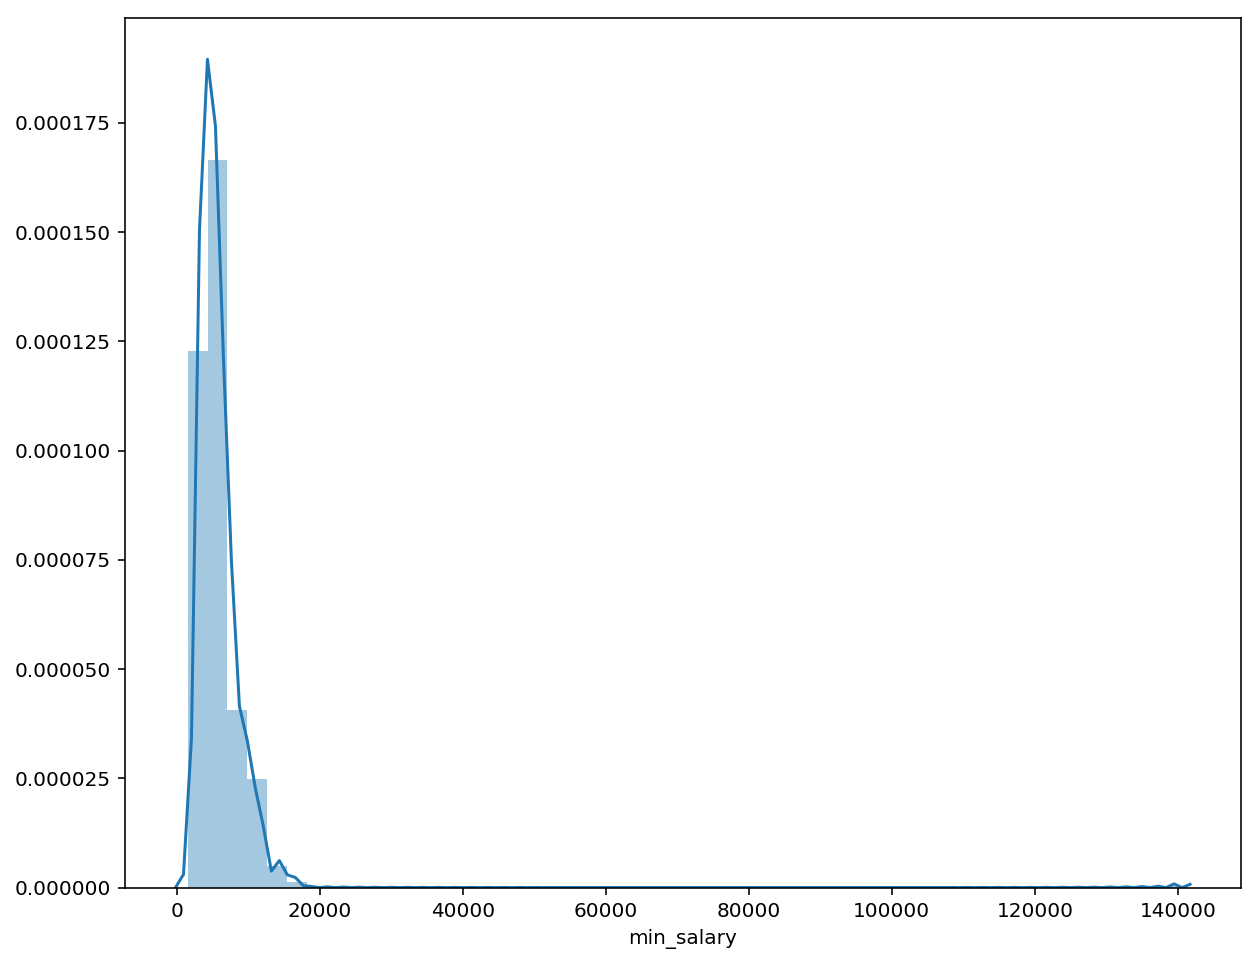

In [92]:
plt.figure(figsize=(10,8))
sns.distplot(df.min_salary)

In [93]:
# Taking the minimum salary as basic salary to predict since the salary range between
# min and max are quite large. According to the histogram of minimum salary, it's skewed
# to positive side. Therefore, median of the minimum salary is used as cutoff rather than
# mean.
print("Mean of minimum salary :",df.min_salary.mean())
print("Median of minimum salary :",df.min_salary.median())      

Mean of minimum salary : 5729.413559322035
Median of minimum salary : 5000.0


In [94]:
df['salary_high_low'] = df.min_salary.apply(lambda x : 1 if x > df.min_salary.median() 
                                          else 0)

In [95]:
df.salary_high_low.value_counts()

0    665
1    515
Name: salary_high_low, dtype: int64

In [96]:
df.head()

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary,salary_high_low
0,https://www.mycareersfuture.sg/job/data-scient...,JOB-2019-0096282,Data Scientist,PANASONIC ASIA PACIFIC PTE. LTD.,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"[Executive, Junior Executive]",None,"$3,000to$4,600",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,IT Consultant Data Scientist The Role IT Cons...,Desired Skills Competencies and Personal Trait...,3000.0,4600.0,0
4,https://www.mycareersfuture.sg/job/senior-data...,JOB-2019-0096069,Senior Database Consultant - Big Data Engineer,PALO IT SINGAPORE PTE. LTD.,51B CIRCULAR ROAD 049406,"Permanent, Full Time",[Professional],3,"$6,000to$12,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,Your profile role on the project YOU Thrive ...,You hold a Bachelor Master or PhD degree in I...,6000.0,12000.0,1
8,https://www.mycareersfuture.sg/job/mis-executi...,JOB-2019-0096039,MIS EXECUTIVE,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,"[Fresh/entry level, Executive]",1,"$2,500to$3,500",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,The MIS Engineer will be responsible for admin...,Candidate must possess at least a Diploma/ De...,2500.0,3500.0,0
9,https://www.mycareersfuture.sg/job/embedded-so...,JOB-2019-0064241,Embedded Software Engineer,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,[Executive],2,"$2,500to$3,000",Monthly,1 application,Posted 07 May 2019,Closing on 06 Jun 2019,Design of Webpage in Embedded Board using PH...,Degree or Diploma in IT or other related disc...,2500.0,3000.0,0
11,https://www.mycareersfuture.sg/job/pre-sales-e...,JOB-2019-0096016,Pre Sales Engineer,NUMERIX SINGAPORE PTE. LTD.,None,Full Time,[Junior Executive],2,"$4,000to$8,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,You will support the regional Sales Specialist...,Qualifications In addition the candidate shou...,4000.0,8000.0,0


In [97]:
df.reset_index(drop=True, inplace=True)

In [98]:
df.head()

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary,salary_high_low
0,https://www.mycareersfuture.sg/job/data-scient...,JOB-2019-0096282,Data Scientist,PANASONIC ASIA PACIFIC PTE. LTD.,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"[Executive, Junior Executive]",None,"$3,000to$4,600",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,IT Consultant Data Scientist The Role IT Cons...,Desired Skills Competencies and Personal Trait...,3000.0,4600.0,0
1,https://www.mycareersfuture.sg/job/senior-data...,JOB-2019-0096069,Senior Database Consultant - Big Data Engineer,PALO IT SINGAPORE PTE. LTD.,51B CIRCULAR ROAD 049406,"Permanent, Full Time",[Professional],3,"$6,000to$12,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,Your profile role on the project YOU Thrive ...,You hold a Bachelor Master or PhD degree in I...,6000.0,12000.0,1
2,https://www.mycareersfuture.sg/job/mis-executi...,JOB-2019-0096039,MIS EXECUTIVE,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,"[Fresh/entry level, Executive]",1,"$2,500to$3,500",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,The MIS Engineer will be responsible for admin...,Candidate must possess at least a Diploma/ De...,2500.0,3500.0,0
3,https://www.mycareersfuture.sg/job/embedded-so...,JOB-2019-0064241,Embedded Software Engineer,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,[Executive],2,"$2,500to$3,000",Monthly,1 application,Posted 07 May 2019,Closing on 06 Jun 2019,Design of Webpage in Embedded Board using PH...,Degree or Diploma in IT or other related disc...,2500.0,3000.0,0
4,https://www.mycareersfuture.sg/job/pre-sales-e...,JOB-2019-0096016,Pre Sales Engineer,NUMERIX SINGAPORE PTE. LTD.,None,Full Time,[Junior Executive],2,"$4,000to$8,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,You will support the regional Sales Specialist...,Qualifications In addition the candidate shou...,4000.0,8000.0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 18 columns):
url                1180 non-null object
id                 1180 non-null object
title              1180 non-null object
company            1180 non-null object
location           1180 non-null object
employment_type    1180 non-null object
seniority          1180 non-null object
min_experience     1180 non-null object
salary_range       1180 non-null object
salary_type        1180 non-null object
no_applicants      1180 non-null object
posted_date        1180 non-null object
closing_date       1180 non-null object
description        1180 non-null object
requirement        1180 non-null object
min_salary         1180 non-null float64
max_salary         1180 non-null float64
salary_high_low    1180 non-null int64
dtypes: float64(2), int64(1), object(15)
memory usage: 166.0+ KB


In [100]:
df_features.loc[:,'salary_high_low'] = df['salary_high_low']
df_features.head()

,Executive,Fresh/entry level,Junior Executive,Manager,Middle Management,Non-executive,Professional,Senior Executive,Senior Management,03,...,youll also,youll rewarded,young,young innovative,youre,youre global,youre integral,youre looking,zookeeper,salary_high_low
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.1.13 Checking Min Experience

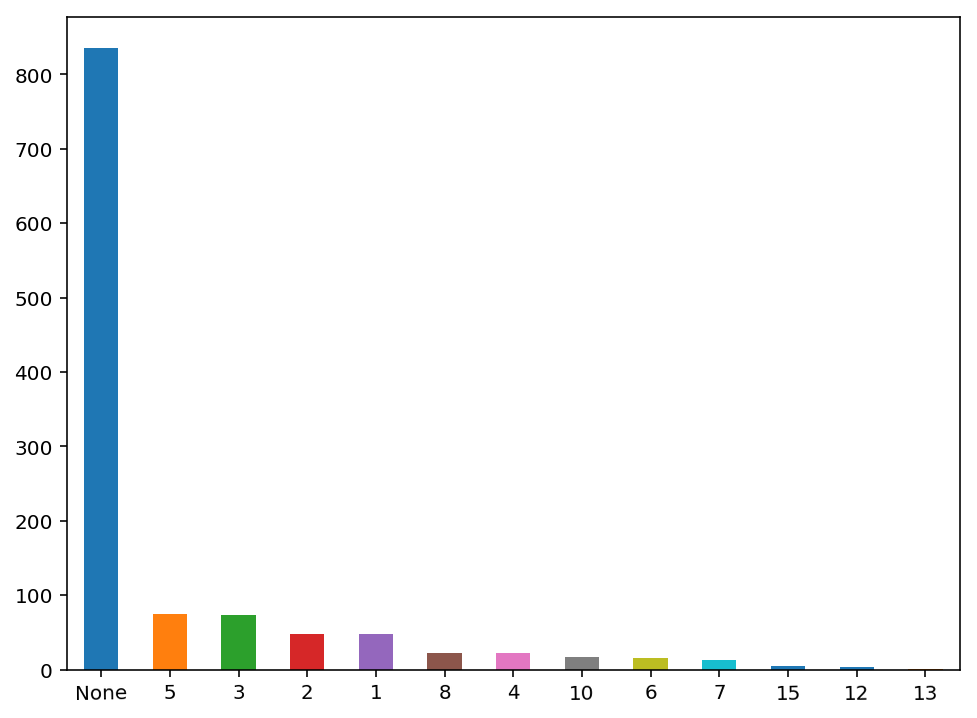

In [101]:
# Checking Min Experience before moving on to modelling
df.min_experience.value_counts().plot(kind='bar',rot=1,figsize=(8,6))

In [102]:
df.min_experience.value_counts()

None    835
5        75
3        73
2        48
1        48
8        23
4        23
10       17
6        16
7        13
15        5
12        3
13        1
Name: min_experience, dtype: int64

In [103]:
df[df.min_experience != 'None']['min_experience'].value_counts().sum()

345

In [104]:
# More than half of the data doesn't provide min experience. Therefore, it'll not be
# used as feature.

### 1.1.14 Checking title

In [105]:
df.title.value_counts()

Data Scientist                                                                      44
Data Engineer                                                                       26
Research Fellow                                                                     13
Software Engineer                                                                   12
Research Associate                                                                  11
Data Analyst                                                                        11
Software Developer                                                                  10
Senior Software Engineer                                                             9
Business Analyst                                                                     8
Project Officer                                                                      8
Manager                                                                              7
DATA SCIENTIST                             

In [202]:
# However, title are not consistance with the job requirements especially Data scinece and
# data analyst job. Some job are related to machine learning or data analysis but the job
# title is like project office or research associate or officer in acedemic area. Beside,
# some company will post as marketing analysis, etc.

## 1.2. Modelling

### 1.2.1 Logistic Regression and Random Forest

In [106]:
# Calculating Baseline accuracy (however since it's binary and pretty balanced, 
# it shall be around 0.5)
baseline_accuracy = 1. - df_features.salary_high_low.mean()
baseline_accuracy

0.5635593220338984

In [107]:
# Setting Features and target
X = df_features[df_features.columns.difference(['salary_high_low'])]
y = df_features.salary_high_low

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=24)

In [108]:
def model_comparison(models, X_train, y_train, score_type, 
                     model1='Logistic Regression', model2='Random Forest'):
    scores_dict = {}
    
    # Use the KFold class to add more options.
    kf_shuffle = KFold(n_splits=10,shuffle=True, random_state=42) 
    
    for model in models:
        scores = cross_val_score(model,X_train,y_train,cv=kf_shuffle,n_jobs=-1,scoring=score_type)
        scores_dict[model] = scores
        
    print("{} Avg Score: ".format(model1),np.mean(scores_dict[models[0]]))
    print("{} Std Score: ".format(model1),np.std(scores_dict[models[0]]))
    print("{} Avg Score: ".format(model2),np.mean(scores_dict[models[1]]))
    print("{} Std Score: ".format(model2),np.std(scores_dict[models[1]]))
        
    return pd.DataFrame(scores_dict)
        

In [109]:
def plot_models_compare_result(result,
                               model1='Logistic Regression',
                               model2='Random Forest'):
    plt.figure(figsize=(8,6))
    result.boxplot()
    plt.xticks(np.arange(3),['',model1,model2])
    plt.show()

In [110]:
def model_evaluation(y_pred,y_pred_pp,model):
    # Checking Accuracy
    print("Accuracy : {}\n".format(accuracy_score(y_test,y_pred)))
    print("ROC AUC Score : {}\n".format(roc_auc_score(y_test,y_pred_pp[:,1])))
    
    # Using confusion_matrix from metrics
    con_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    
    # Creating confusion_matrix dataframe
    confusion_matrix_df = pd.DataFrame(con_matrix, 
                                       index=['Low Salary','High Salary'],
                                       columns=['Prediced Low Salary',
                                                'Prediced High Salary'])
    print(confusion_matrix_df,'\n')
    print(classification_report(y_test,y_pred),'\n')
    
    y_pred_pp_df = pd.DataFrame(y_pred_pp, columns=['class_0_pp','class_1_pp'])
   
    # Plotting ROC curve

    # Finding the area under the curve for class 1 (High Salary : Salary > median) 
    fpr, tpr, _ = roc_curve(y_test, y_pred_pp_df.class_1_pp)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot([0,1], [0,1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver Operating Characteristic (ROC) for salary prediction - {}'.format(model), fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Logistic Regression Avg Score:  0.7227593300029386
Logistic Regression Std Score:  0.04277468801358838
Random Forest Avg Score:  0.6924184543050249
Random Forest Std Score:  0.07048629992054514


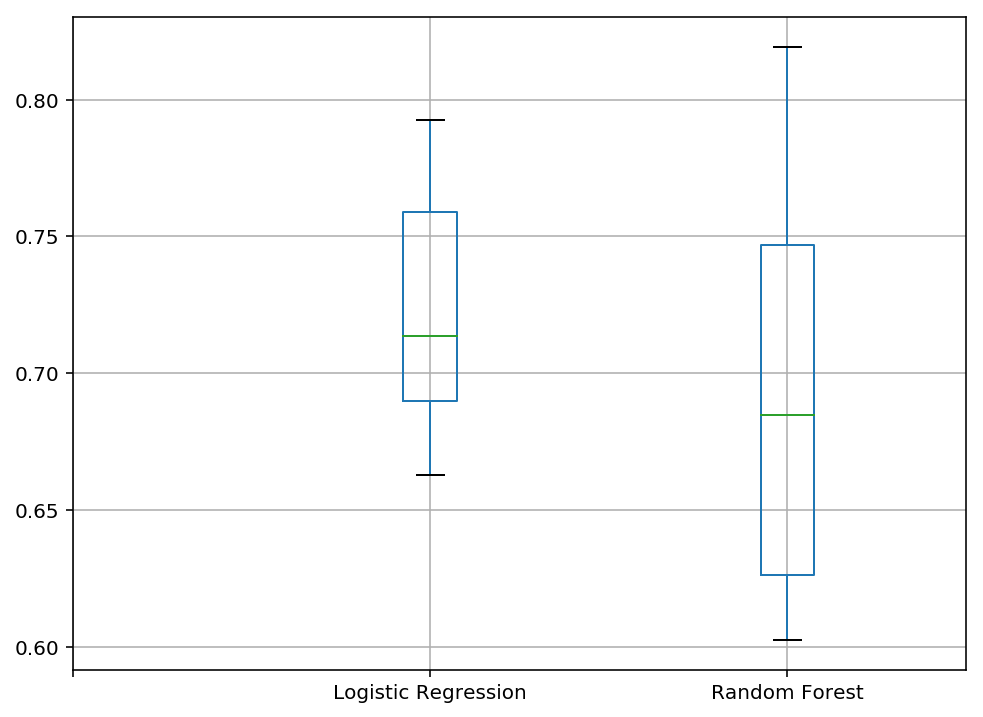

In [111]:
logreg = LogisticRegression()
rfc = RandomForestClassifier()

print(logreg)
print(rfc)

# checking model's ccross_val_score to compare and plot boxplot from the scores
models_compare_result = model_comparison([logreg,rfc], X_train, y_train, 'accuracy')
plot_models_compare_result(models_compare_result)

Accuracy : 0.6949152542372882

ROC AUC Score : 0.7679084967320261

             Prediced Low Salary  Prediced High Salary
Low Salary                    90                    60
High Salary                   48                   156 

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       204
           1       0.65      0.60      0.63       150

   micro avg       0.69      0.69      0.69       354
   macro avg       0.69      0.68      0.68       354
weighted avg       0.69      0.69      0.69       354
 



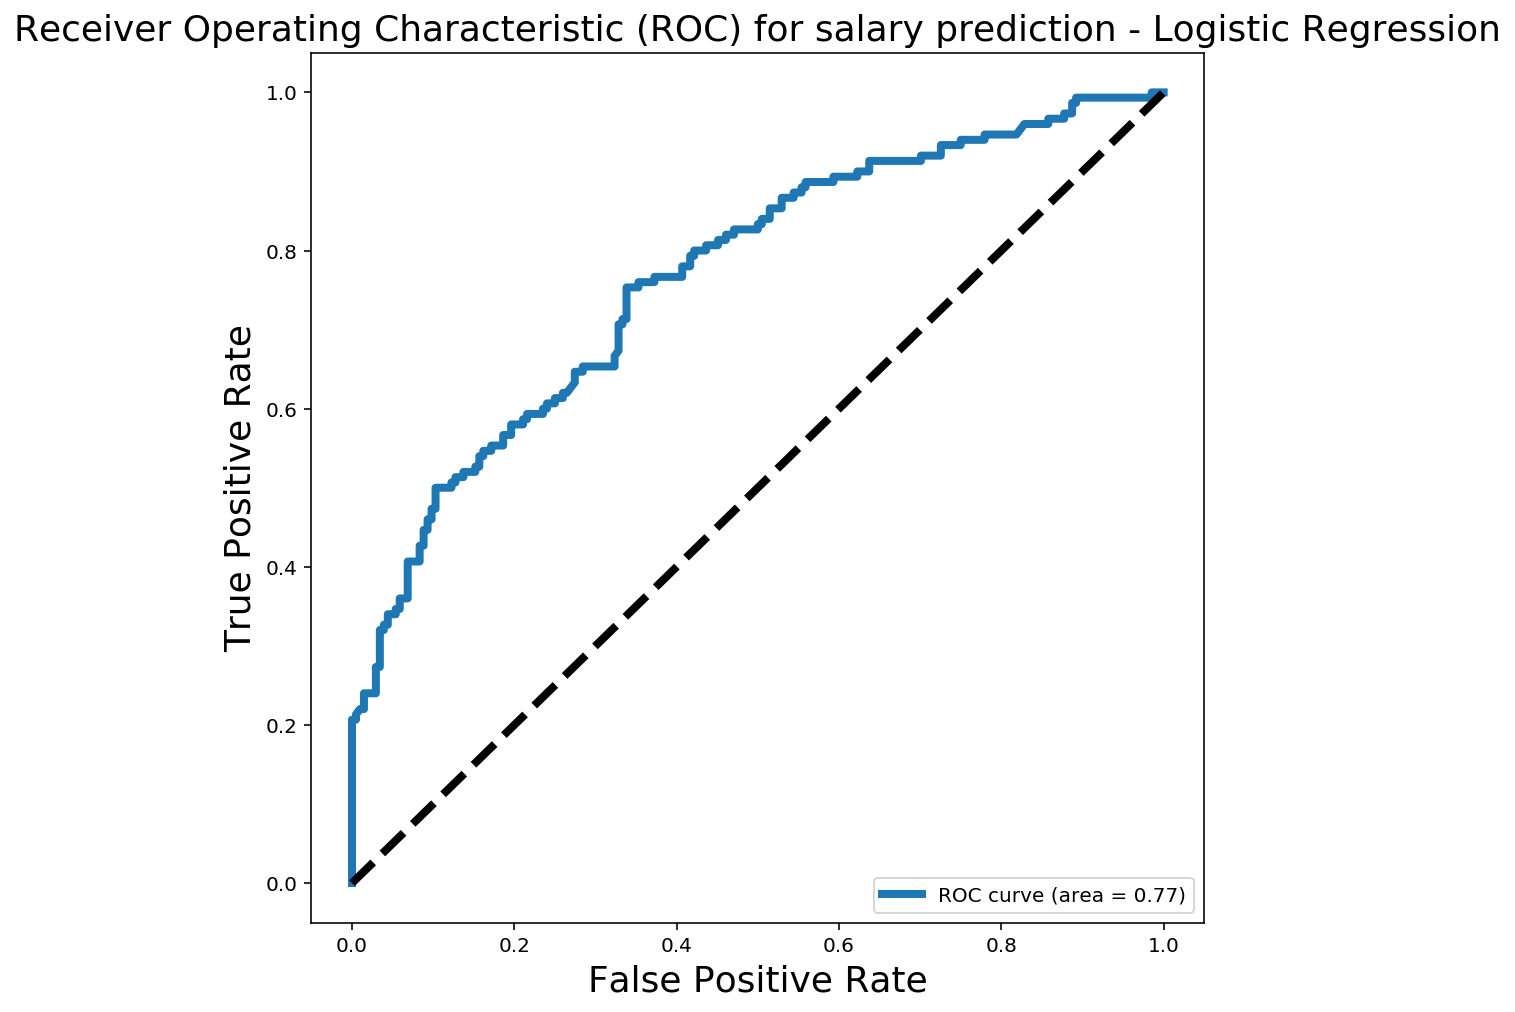

In [112]:
logreg.fit(X_train,y_train)

yhat = logreg.predict(X_test)
yhat_pp = logreg.predict_proba(X_test)

model_evaluation(yhat,yhat_pp,"Logistic Regression")

Accuracy : 0.7033898305084746

ROC AUC Score : 0.7372385620915034

             Prediced Low Salary  Prediced High Salary
Low Salary                    78                    72
High Salary                   33                   171 

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       204
           1       0.70      0.52      0.60       150

   micro avg       0.70      0.70      0.70       354
   macro avg       0.70      0.68      0.68       354
weighted avg       0.70      0.70      0.69       354
 



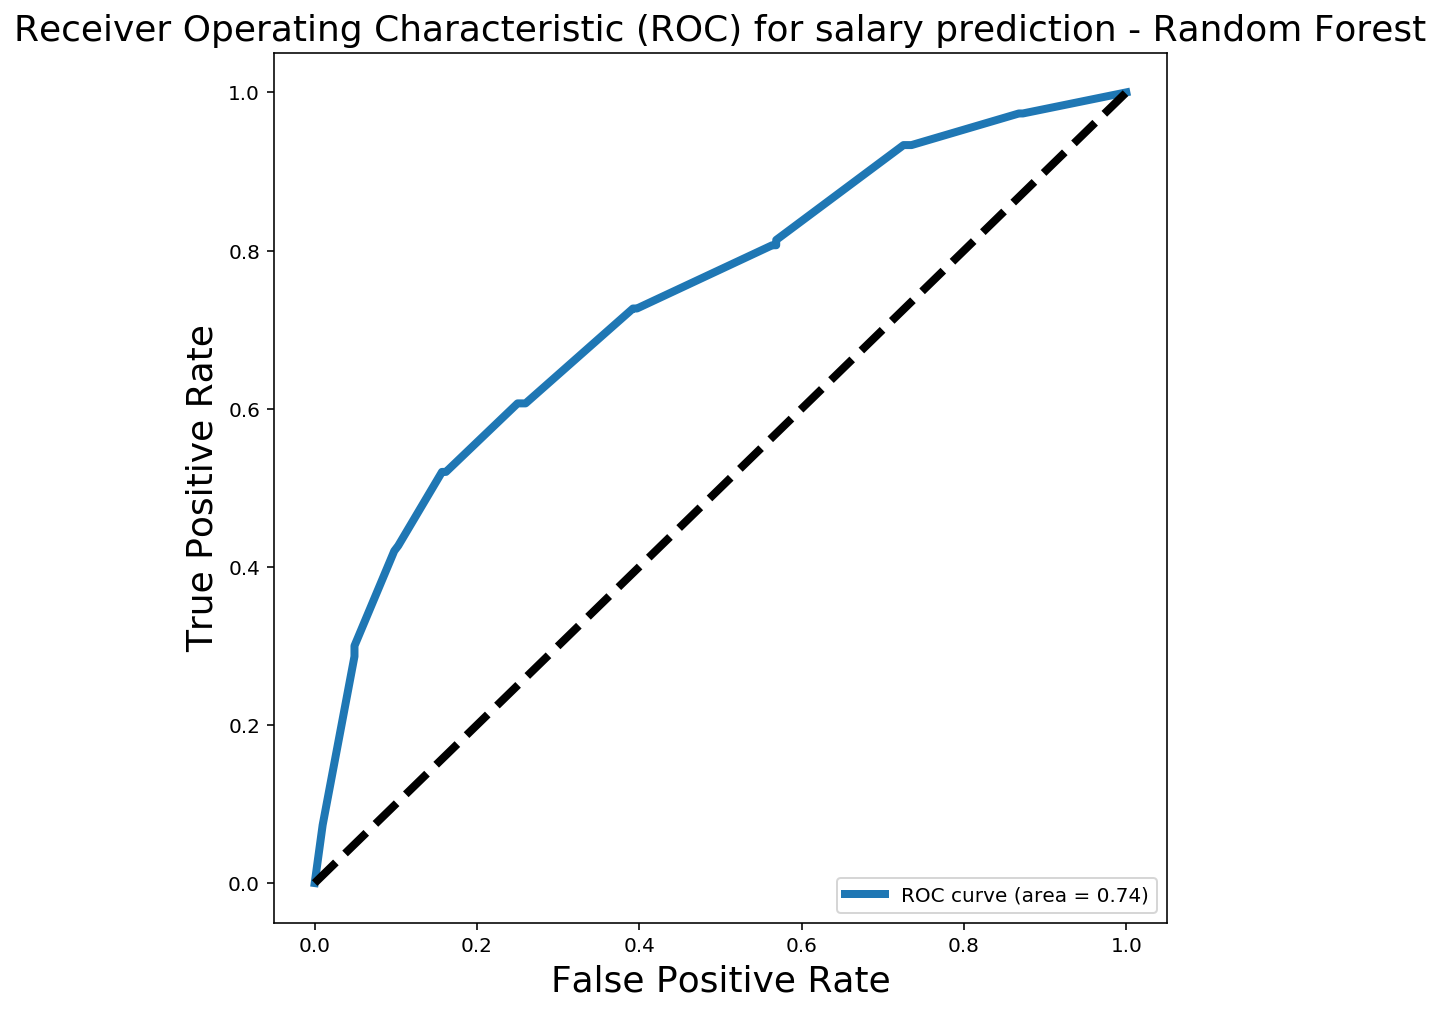

In [113]:
rfc.fit(X_train,y_train)

yhat = rfc.predict(X_test)
yhat_pp = rfc.predict_proba(X_test)

model_evaluation(yhat,yhat_pp,'Random Forest')

Logistic Regression Avg Score:  0.6706807448804712
Logistic Regression Std Score:  0.10801443801500854
Random Forest Avg Score:  0.48995887790707426
Random Forest Std Score:  0.1044037848912269


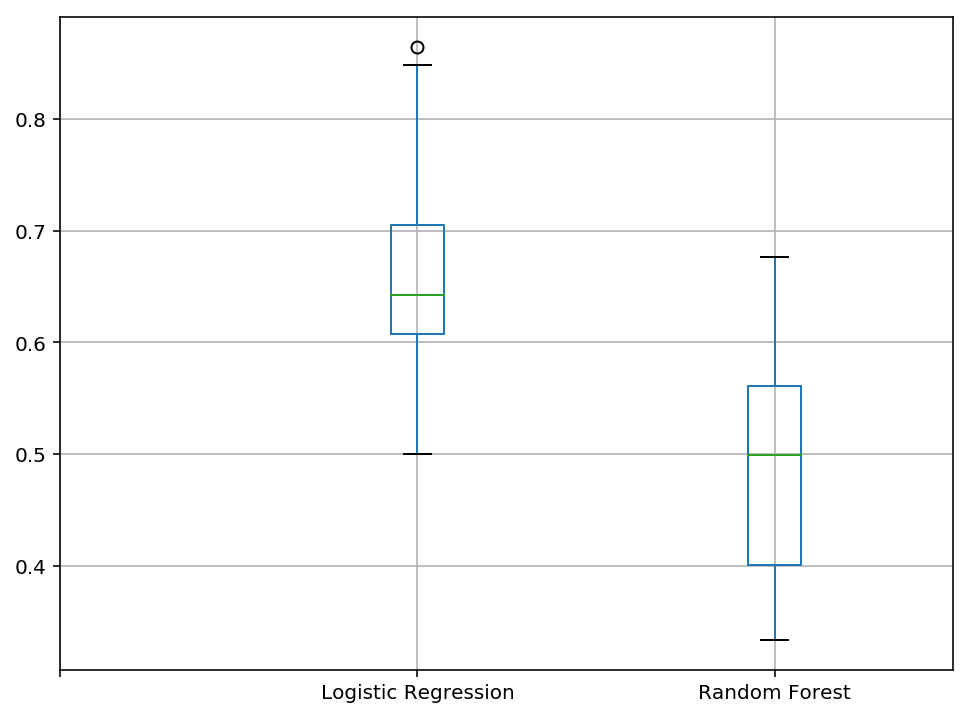

In [114]:
models_compare_result = model_comparison([logreg,rfc], X_train, y_train,'recall')
plot_models_compare_result(models_compare_result)

### 1.2.2 Tuning parameters with GridSearch

In [115]:
def logreg_gridsearch(X_train,y_train):
    # Create  hyperparameter options
    logreg_params = {
            'penalty':['l1','l2'],
            'C':np.logspace(-2,2,500),
            'solver':['liblinear']
    }
    # Create grid search using 5-fold cross validation
    grid_logreg = GridSearchCV(logreg, logreg_params, cv=10,n_jobs=-1, verbose=1)
    grid_logreg.fit(X_train, y_train)

    print('best score: ', grid_logreg.best_score_)
    print('best parameters: ', grid_logreg.best_params_)
    print('best estimator: ', grid_logreg.best_estimator_)
    
    return grid_logreg.best_estimator_

In [116]:
# With GridSearch
best_logreg_model = logreg_gridsearch(X_train,y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:  4.9min


best score:  0.7300242130750605
best parameters:  {'C': 0.03198968915434538, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator:  LogisticRegression(C=0.03198968915434538, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  5.1min finished
/Users/nandar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Logestic Regression Avg Score:  0.7227593300029386
Logestic Regression Std Score:  0.04277468801358838
Logestic Regression with gridsearch Avg Score:  0.7263297090802233
Logestic Regression with gridsearch Std Score:  0.05876198127569061


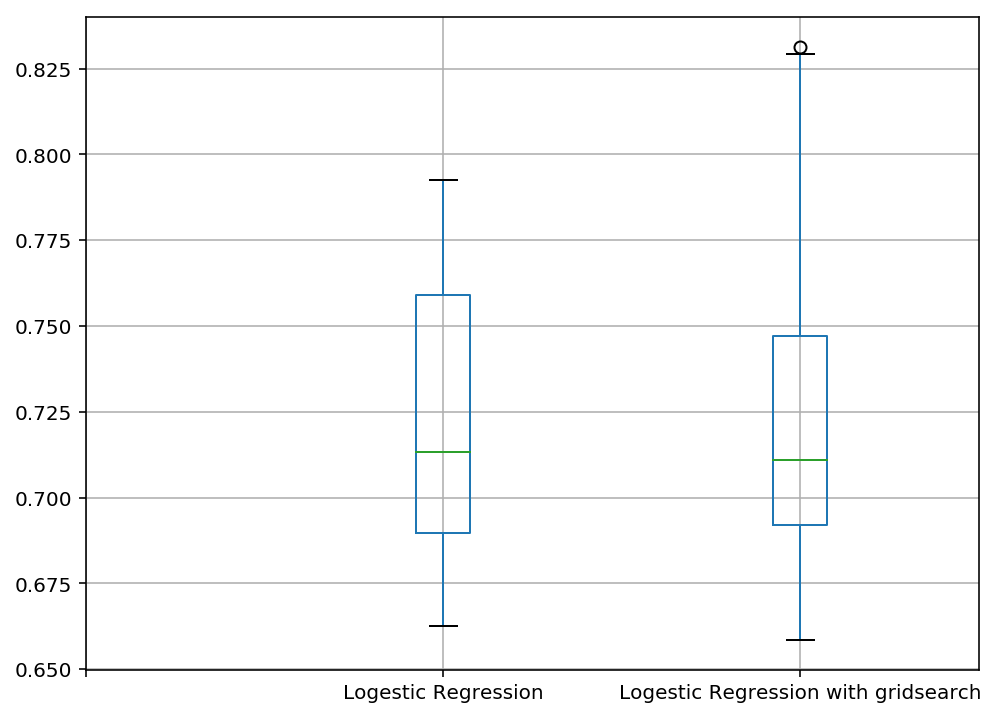

In [117]:
models_compare_result = model_comparison([logreg,best_logreg_model], 
                                         X_train, y_train, 'accuracy',
                                         'Logestic Regression',
                                         'Logestic Regression with gridsearch')
plot_models_compare_result(models_compare_result,"Logestic Regression",
                           "Logestic Regression with gridsearch")

Accuracy : 0.7231638418079096

ROC AUC Score : 0.7911764705882354

             Prediced Low Salary  Prediced High Salary
Low Salary                    88                    62
High Salary                   36                   168 

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       204
           1       0.71      0.59      0.64       150

   micro avg       0.72      0.72      0.72       354
   macro avg       0.72      0.71      0.71       354
weighted avg       0.72      0.72      0.72       354
 



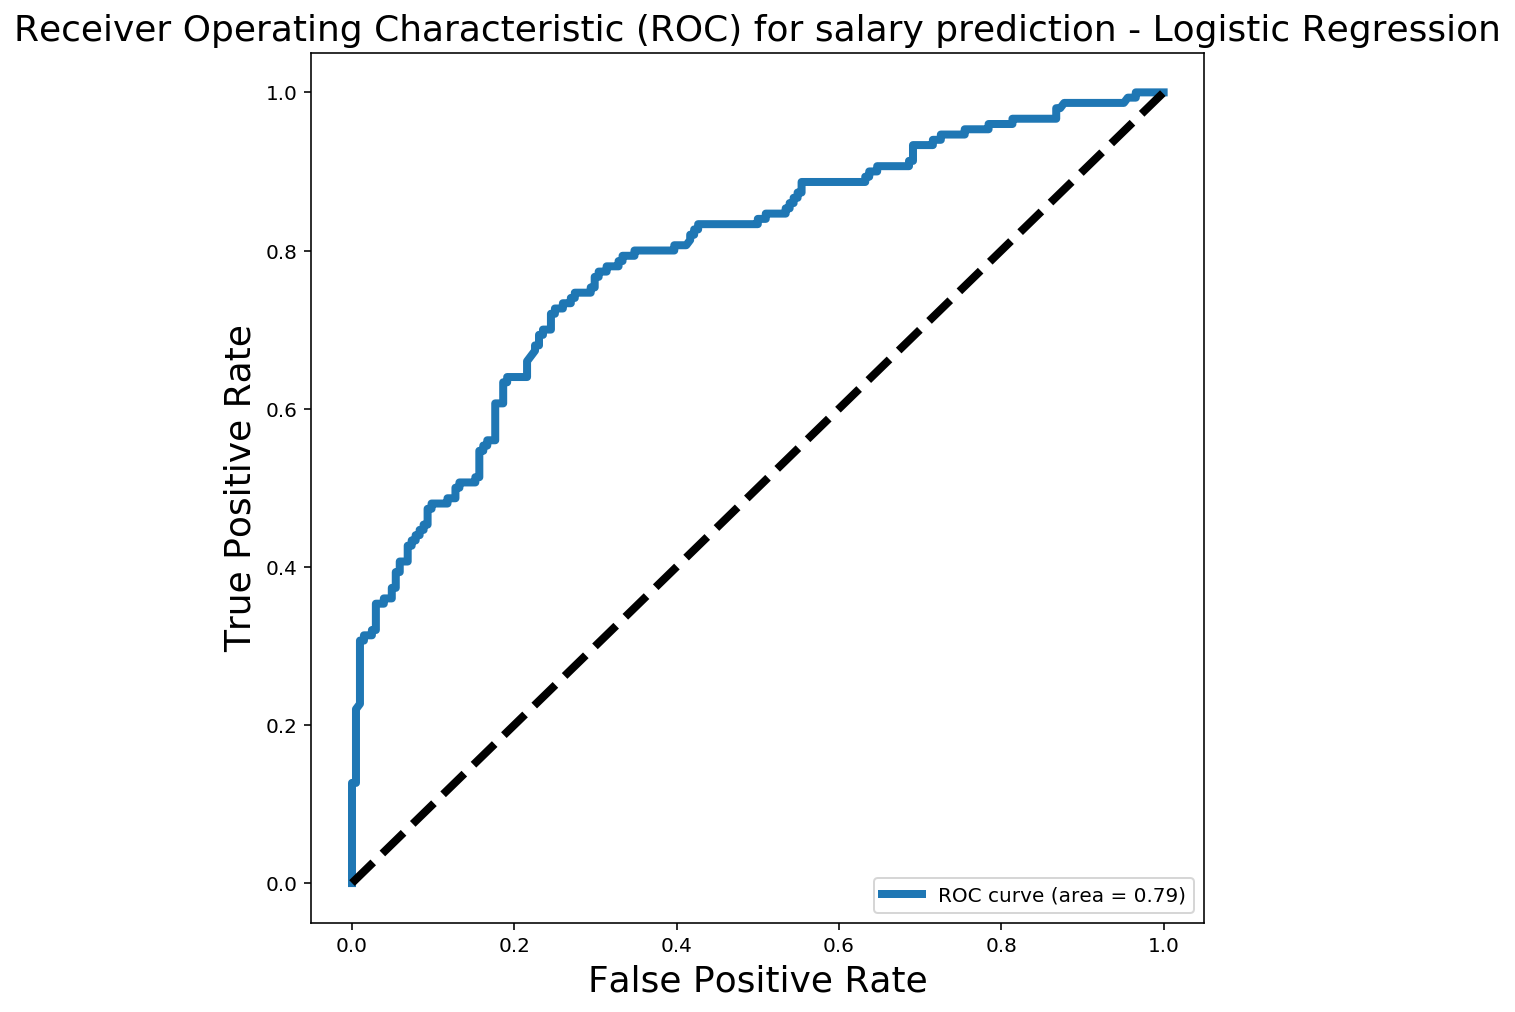

In [118]:
yhat = best_logreg_model.predict(X_test)
yhat_pp = best_logreg_model.predict_proba(X_test)

model_evaluation(yhat,yhat_pp,"Logistic Regression")

In [119]:
def rfc_gridsearch(X_train,y_train):
    # Create  hyperparameter options
    rfc_params = {
        'n_estimators':[50,100,200,300,400,500,600,700,800,900,1000],
        'min_samples_split':range(2,8)
    }
    # Create grid search using 10-fold cross validation
    grid_rfc = GridSearchCV(rfc, rfc_params, cv=10,n_jobs=-1, verbose=1)
    grid_rfc.fit(X_train, y_train)

    print('best score: ', grid_rfc.best_score_)
    print('best parameters: ', grid_rfc.best_params_)
    print('best estimator: ', grid_rfc.best_estimator_)
    
    return grid_rfc.best_estimator_

In [120]:
# With GridSearch
best_rfc_model = rfc_gridsearch(X_train,y_train)

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:  7.2min finished
/Users/nandar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best score:  0.738498789346247
best parameters:  {'min_samples_split': 2, 'n_estimators': 200}
best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [121]:
best_rfc_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Random Forest Avg Score:  0.6804584190420218
Random Forest Std Score:  0.058800859634497195
Random Forest with gridsearch Avg Score:  0.7142080517190714
Random Forest with gridsearch Std Score:  0.06895665060710048


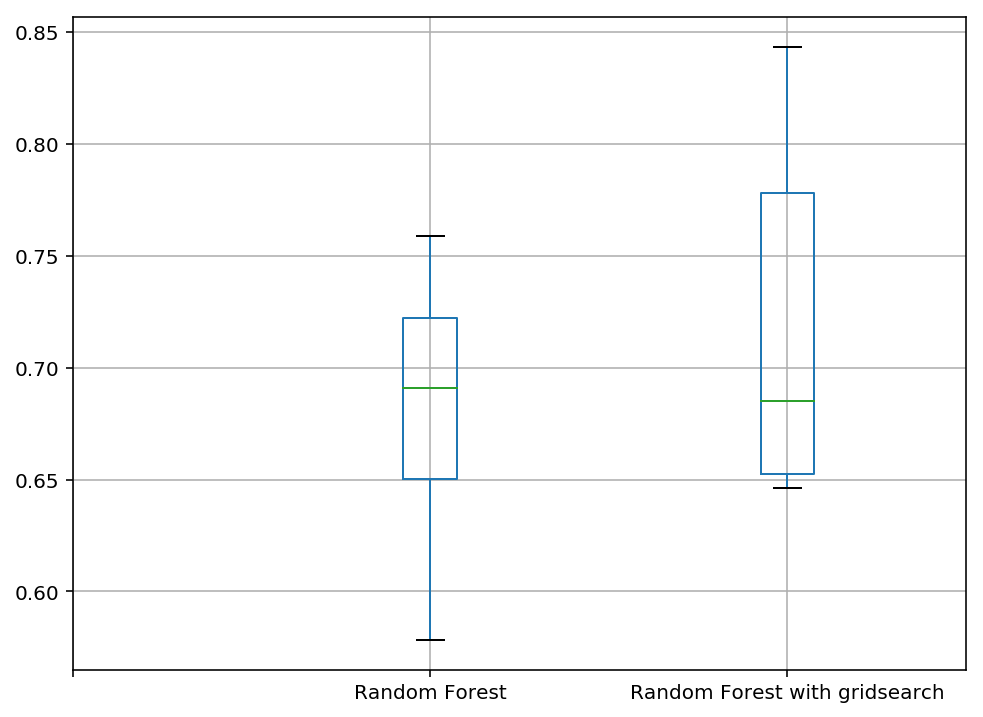

In [122]:
models_compare_result = model_comparison([rfc,best_rfc_model], 
                                         X_train, y_train, 'accuracy',
                                         'Random Forest',
                                         'Random Forest with gridsearch')
plot_models_compare_result(models_compare_result,"Random Forest",
                           "Random Forest with gridsearch")

Accuracy : 0.7259887005649718

ROC AUC Score : 0.7696078431372549

             Prediced Low Salary  Prediced High Salary
Low Salary                    93                    57
High Salary                   40                   164 

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       204
           1       0.70      0.62      0.66       150

   micro avg       0.73      0.73      0.73       354
   macro avg       0.72      0.71      0.71       354
weighted avg       0.72      0.73      0.72       354
 



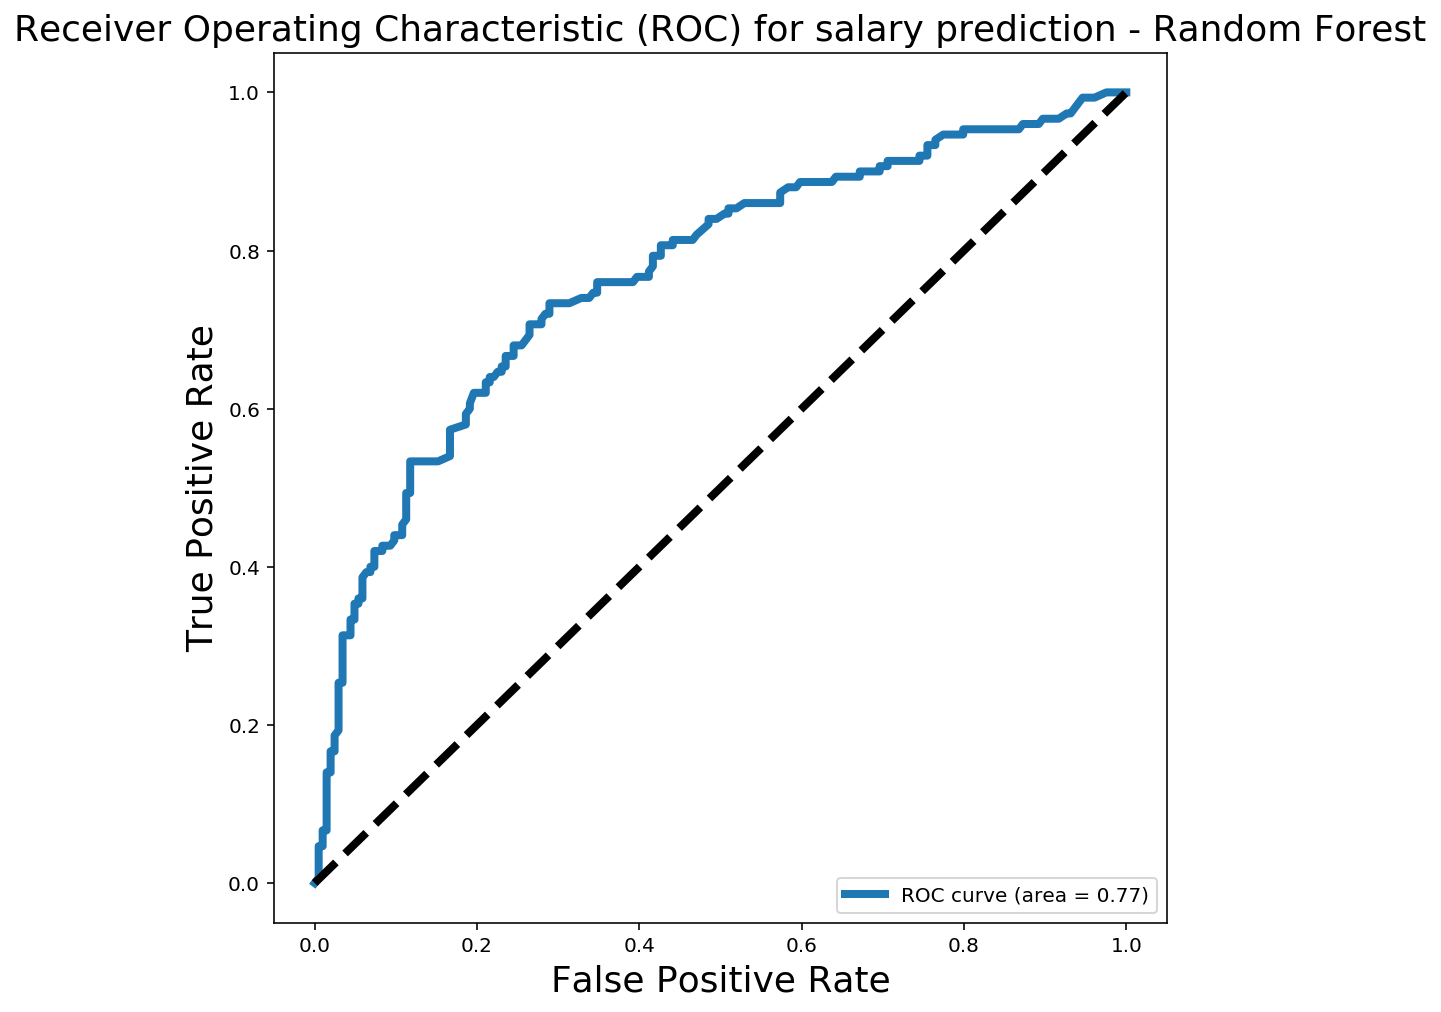

In [123]:
yhat = best_rfc_model.predict(X_test)
yhat_pp = best_rfc_model.predict_proba(X_test)

model_evaluation(yhat,yhat_pp,"Random Forest")

### 1.2.3 Adding Description as features

In [257]:
df_features_desc = pd.concat([seniority_df,requirement_df,description_df],axis=1)
df_features_desc.loc[:,'salary_high_low'] = df['salary_high_low']
print(df_features_desc.columns)

# Setting Features and target
X_desc = df_features_desc[df_features.columns.difference(['salary_high_low'])]
y_desc = df_features_desc.salary_high_low

# Splitting data into train and test
X_train_desc, X_test_desc, y_train_desc, y_test_desc = train_test_split(X_desc, y_desc, 
                                                              test_size=0.3, 
                                                              random_state=24)


Index(['Executive', 'Fresh/entry level', 'Junior Executive', 'Manager',
       'Middle Management', 'Non-executive', 'Professional',
       'Senior Executive', 'Senior Management', '03',
       ...
       'youre defined', 'youre defined teach', 'youtube', 'youtube social',
       'youtube social local', 'youve', 'zero', 'zero defect',
       'zero defect code', 'salary_high_low'],
      dtype='object', length=15382)


In [258]:
X_desc.shape

(1180, 8007)

In [259]:
# trying SelectKBest for selecting Features
X_new = SelectKBest(chi2, k=20).fit(X_desc, y_desc)
X_new.scores_

array([ 0.54382072,  5.03712471, 34.90950293, ...,  7.74757282,
        7.74757282,  6.25578509])

In [260]:
len(X_new.scores_)

8007

In [261]:
df_scores = pd.DataFrame(X_new.scores_)
df_columns = pd.DataFrame(X_desc.columns)
#concat two dataframes for better visualization 
feature_Scores = pd.concat([df_columns,df_scores],axis=1)
feature_Scores.columns = ['Industry factors','Score']  #naming the dataframe columns
print(feature_Scores.nlargest(20,'Score'))  #print 10 best features

     Industry factors       Score
910          business  163.130846
6068         research  144.298788
664               aws  141.138322
7177            teams  128.080154
1767             data  114.516617
6649        solutions  105.316896
3248           google   95.489874
5504          product   85.253440
633             audit   75.897666
4058             lead   74.287729
4065       leadership   72.981375
2401            drive   71.031709
4295       management   70.705962
1200            cloud   69.312988
7406        tookitaki   67.145631
505          approach   63.846079
6482         services   62.885692
6240            sales   62.381949
6912         strategy   60.923151
5967       regulatory   60.664726


In [262]:
features = X_new.transform(X_desc)

In [263]:
features.shape

(1180, 20)

In [264]:
features[0:10]

array([[ 0,  0,  0,  6,  0,  3,  3,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  2,  0],
       [ 0,  0,  3,  0,  6,  4,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  1,  0,  1,  0,  2,  6,  0,  0, 11,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  4,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  1,
         0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  0,  0,  5,  0,  3,  2, 10,  1,  1,  1,  2,  0,  0,  0,  3,
         0,  0,  4,  0]])

In [272]:
X_desc[['business','research','aws','leads']]

,business,business,research,research,aws,aws,leads,leads
0,1,6,0,0,0,0,0,0
1,0,0,0,0,0,3,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0
5,0,2,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0
7,2,1,0,0,0,0,0,0
8,0,2,0,0,0,0,0,0
9,1,5,0,0,0,0,0,0


In [125]:
# With GridSearch
best_logreg_model_desc = logreg_gridsearch(X_train_desc,y_train_desc)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 10000 out of 1000

best score:  0.7421307506053268
best parameters:  {'C': 2.539859068780724, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator:  LogisticRegression(C=2.539859068780724, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


Accuracy : 0.751412429378531

ROC AUC Score : 0.7931862745098037

             Prediced Low Salary  Prediced High Salary
Low Salary                   104                    46
High Salary                   42                   162 

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       204
           1       0.71      0.69      0.70       150

   micro avg       0.75      0.75      0.75       354
   macro avg       0.75      0.74      0.74       354
weighted avg       0.75      0.75      0.75       354
 



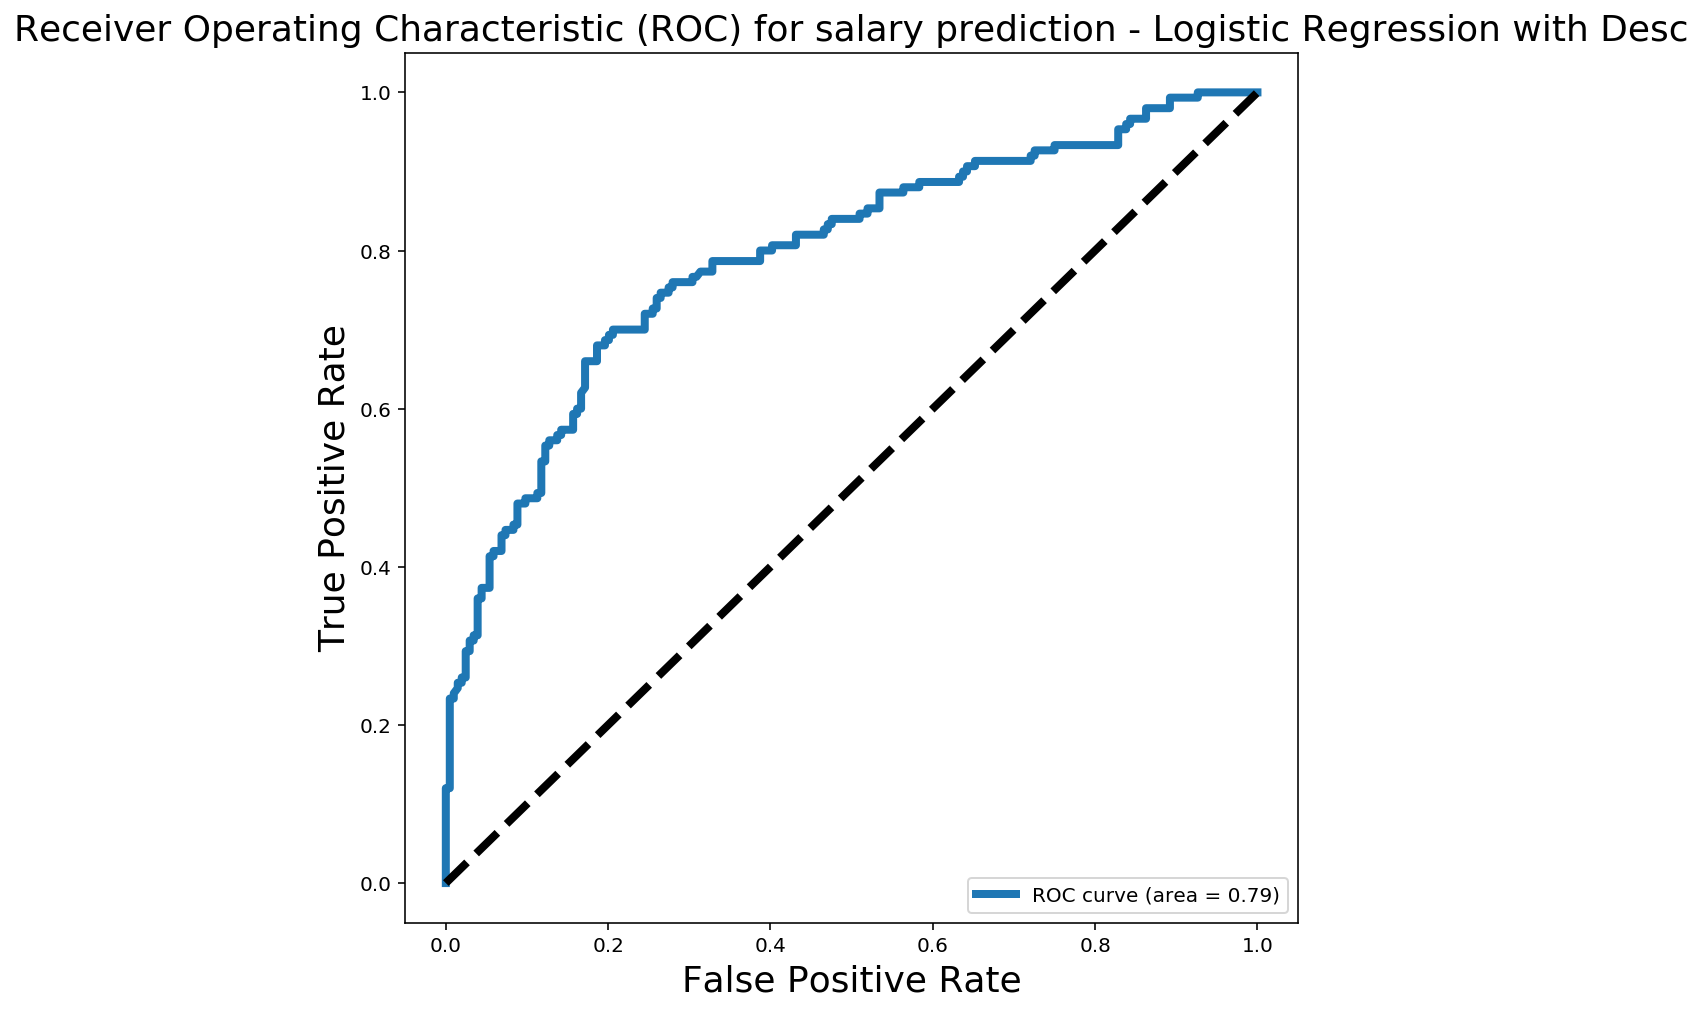

In [126]:
yhat = best_logreg_model_desc.predict(X_test_desc)
yhat_pp = best_logreg_model_desc.predict_proba(X_test_desc)

model_evaluation(yhat,yhat_pp,"Logistic Regression with Desc")

In [127]:
# With GridSearch
best_rfc_model_desc = rfc_gridsearch(X_train_desc,y_train_desc)

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:  8.0min finished


best score:  0.7518159806295399
best parameters:  {'min_samples_split': 4, 'n_estimators': 900}
best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Accuracy : 0.7231638418079096

ROC AUC Score : 0.7980555555555555

             Prediced Low Salary  Prediced High Salary
Low Salary                    95                    55
High Salary                   43                   161 

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       204
           1       0.69      0.63      0.66       150

   micro avg       0.72      0.72      0.72       354
   macro avg       0.72      0.71      0.71       354
weighted avg       0.72      0.72      0.72       354
 



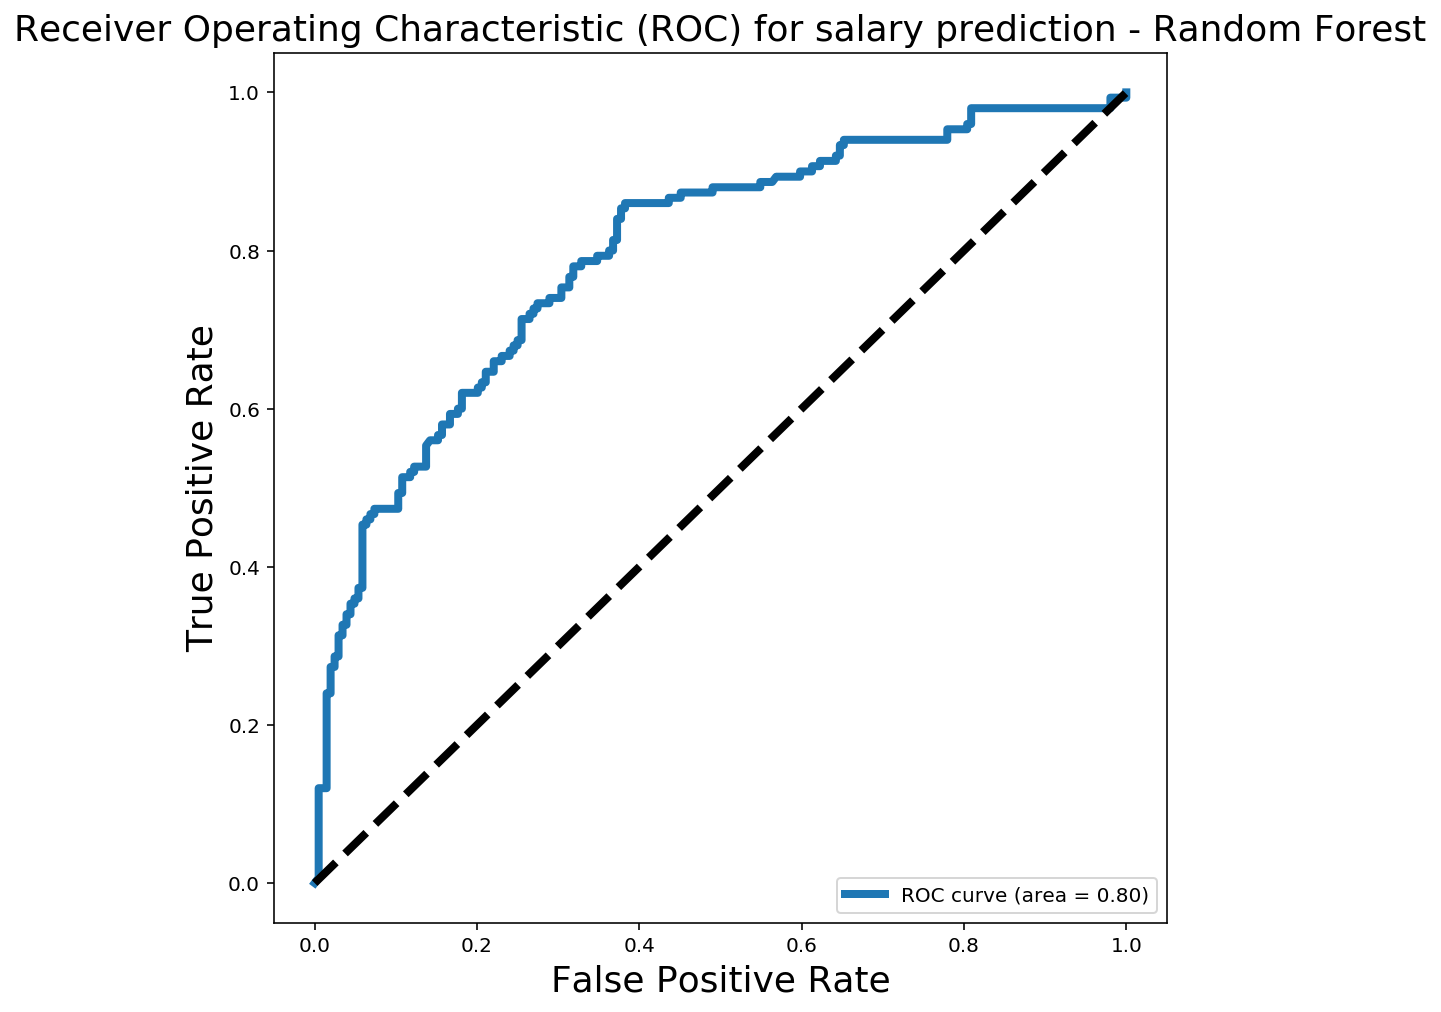

In [128]:
yhat = best_rfc_model_desc.predict(X_test_desc)
yhat_pp = best_rfc_model_desc.predict_proba(X_test_desc)

model_evaluation(yhat,yhat_pp,'Random Forest with Desc')

In [133]:
# Features Decision

features_importance_df = pd.DataFrame({'Features': X.columns,
                                       'coef': best_logreg_model_desc.coef_[0], 
                                       'abs_coef': abs(best_logreg_model_desc.coef_[0])})
features_importance_df.head()

,Features,coef,abs_coef
0,03,0.002345,0.002345
1,07c5639,0.043907,0.043907
2,10,0.559855,0.559855
3,10,0.009090,0.009090
4,10 years,0.457907,0.457907


In [191]:
features_importance_df.sort_values('coef',ascending=False).head(10)

,Features,coef,abs_coef
71,Senior Management,2.008918,2.008918
66,Manager,1.607671,1.607671
70,Senior Executive,0.828239,0.828239
69,Professional,0.686923,0.686923
3824,inventory levels,0.682527,0.682527
4733,networks,0.563592,0.563592
2,10,0.559855,0.559855
4752,next,0.540653,0.540653
5504,product,0.529722,0.529722
2844,experienced,0.498979,0.498979


In [190]:
features_importance_df.sort_values('abs_coef',ascending=False).head(10)

,Features,coef,abs_coef
71,Senior Management,2.008918,2.008918
66,Manager,1.607671,1.607671
64,Fresh/entry level,-1.582777,1.582777
3123,fresh,-1.274289,1.274289
65,Junior Executive,-1.163516,1.163516
63,Executive,-1.010334,1.010334
36,23 years,-0.914130,0.914130
35,23,-0.896118,0.896118
70,Senior Executive,0.828239,0.828239
3154,function,-0.812287,0.812287


In [193]:
features_importance_df[features_importance_df.Features.str.contains('requirements')]\
                        .sort_values('coef', ascending = False).head(15)                                                                                          

,Features,coef,abs_coef
6057,requirements gathering,0.286051,0.286051
6048,requirements,0.188392,0.188392
6063,requirements years,0.141644,0.141644
964,business requirements,0.117827,0.117827
6062,requirements strong,0.080220,0.080220
7214,technical requirements,0.050745,0.050745
6051,requirements bachelors,0.049172,0.049172
7272,technology requirements,0.028666,0.028666
6059,requirements phd,0.027662,0.027662
6053,requirements bsc,0.027523,0.027523


In [195]:
features_importance_df[features_importance_df.Features.str.contains('requirements')]\
                                .sort_values('abs_coef', ascending = False).head(15)

,Features,coef,abs_coef
6049,requirements,-0.347455,0.347455
6057,requirements gathering,0.286051,0.286051
6048,requirements,0.188392,0.188392
6063,requirements years,0.141644,0.141644
964,business requirements,0.117827,0.117827
6054,requirements degree,-0.115970,0.115970
7095,system requirements,-0.089128,0.089128
1877,data requirements,-0.087450,0.087450
6062,requirements strong,0.080220,0.080220
1878,data requirements,-0.071044,0.071044


Conclusion for Question 1: <br>
In this project, Logistic regression and Random forest are used for modelling since one is basic classification model and another is based on decision tree classification.

After analysis on features coefficient from logistic regression, experience such as 23 years, 10 years, etc. and qualification such as degree, msc, phd, etc. are the main factors to decide high pay job or not. Other facotrs such as technical requirements and nontechnical requirements (e.g. personality skills) are also supporting factors in deciding high or low pay job. Other than that, there are a lot of rooms to imporve in this project such as selecting the features by using SelectKBest or PCA to reduce computational time and pipeline to arrange the code better.

## Question 2 : Factors that distinguish job category

### 2.1.1 Creating the target for distinguishing junior vs. senior positions

In [129]:
df.head()

,url,id,title,company,location,employment_type,seniority,min_experience,salary_range,salary_type,no_applicants,posted_date,closing_date,description,requirement,min_salary,max_salary,salary_high_low
0,https://www.mycareersfuture.sg/job/data-scient...,JOB-2019-0096282,Data Scientist,PANASONIC ASIA PACIFIC PTE. LTD.,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"[Executive, Junior Executive]",None,"$3,000to$4,600",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,IT Consultant Data Scientist The Role IT Cons...,Desired Skills Competencies and Personal Trait...,3000.0,4600.0,0
1,https://www.mycareersfuture.sg/job/senior-data...,JOB-2019-0096069,Senior Database Consultant - Big Data Engineer,PALO IT SINGAPORE PTE. LTD.,51B CIRCULAR ROAD 049406,"Permanent, Full Time",[Professional],3,"$6,000to$12,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,Your profile role on the project YOU Thrive ...,You hold a Bachelor Master or PhD degree in I...,6000.0,12000.0,1
2,https://www.mycareersfuture.sg/job/mis-executi...,JOB-2019-0096039,MIS EXECUTIVE,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,"[Fresh/entry level, Executive]",1,"$2,500to$3,500",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,The MIS Engineer will be responsible for admin...,Candidate must possess at least a Diploma/ De...,2500.0,3500.0,0
3,https://www.mycareersfuture.sg/job/embedded-so...,JOB-2019-0064241,Embedded Software Engineer,POWERMATIC DATA SYSTEMS LIMITED,9 HARRISON ROAD 369651,Full Time,[Executive],2,"$2,500to$3,000",Monthly,1 application,Posted 07 May 2019,Closing on 06 Jun 2019,Design of Webpage in Embedded Board using PH...,Degree or Diploma in IT or other related disc...,2500.0,3000.0,0
4,https://www.mycareersfuture.sg/job/pre-sales-e...,JOB-2019-0096016,Pre Sales Engineer,NUMERIX SINGAPORE PTE. LTD.,None,Full Time,[Junior Executive],2,"$4,000to$8,000",Monthly,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,You will support the regional Sales Specialist...,Qualifications In addition the candidate shou...,4000.0,8000.0,0


In [130]:
df.seniority.value_counts()

[Professional]                                                            319
[Executive]                                                               216
[Senior Executive]                                                        125
[Manager]                                                                 117
[Non-executive]                                                            72
[Middle Management]                                                        55
[Senior Management]                                                        51
[Junior Executive]                                                         50
[Fresh/entry level]                                                        36
[Professional, Senior Executive]                                           24
[Professional, Executive]                                                  16
[Professional, Executive, Senior Executive]                                13
[Executive, Senior Executive]                                   

In [131]:
senior_keywords = ['Manager','Middle Management','Senior Management','Senior Executive']
#senior_keywords = ['Manager','Middle Management','Senior Management']
df['Senior_Junior'] = [1 if any(key in df['seniority'][index] for key in senior_keywords)
                       else 0 for index in df.index]

In [132]:
df['Senior_Junior'].value_counts()

0    732
1    448
Name: Senior_Junior, dtype: int64

### 2.2.1 Starting Modelling with Description Features

In [207]:
baseline_accuracy = 1. - df.Senior_Junior.mean()
baseline_accuracy

0.6203389830508474

In [196]:
X = description_df
y = df.Senior_Junior

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [197]:
X.shape

(1180, 9829)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Logistic Regression Avg Score:  0.7300470173376432
Logistic Regression Std Score:  0.04638161396217684
Random Forest Avg Score:  0.6622832794593007
Random Forest Std Score:  0.04394800129108425


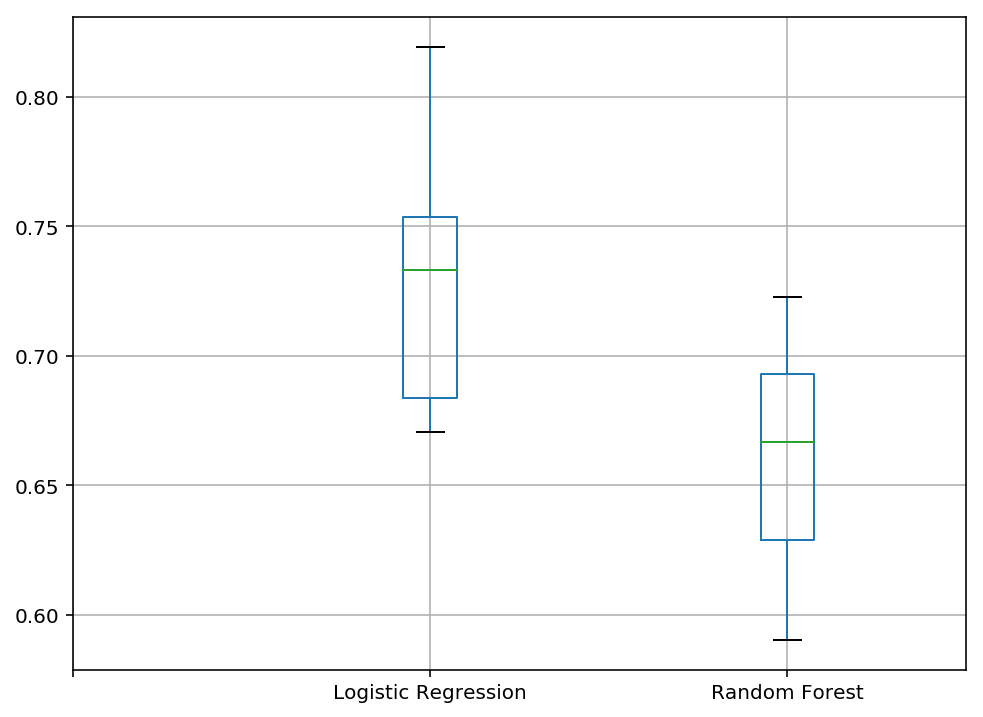

In [198]:
logreg = LogisticRegression()
rfc = RandomForestClassifier()

print(logreg)
print(rfc)

# checking model's ccross_val_score to compare and plot boxplot from the scores
models_compare_result = model_comparison([logreg,rfc], X_train, y_train, 'accuracy')
plot_models_compare_result(models_compare_result)

Accuracy : 0.7090395480225988

ROC AUC Score : 0.7508387010198605

             Prediced Low Salary  Prediced High Salary
Low Salary                    72                    66
High Salary                   37                   179 

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       216
           1       0.66      0.52      0.58       138

   micro avg       0.71      0.71      0.71       354
   macro avg       0.70      0.68      0.68       354
weighted avg       0.70      0.71      0.70       354
 



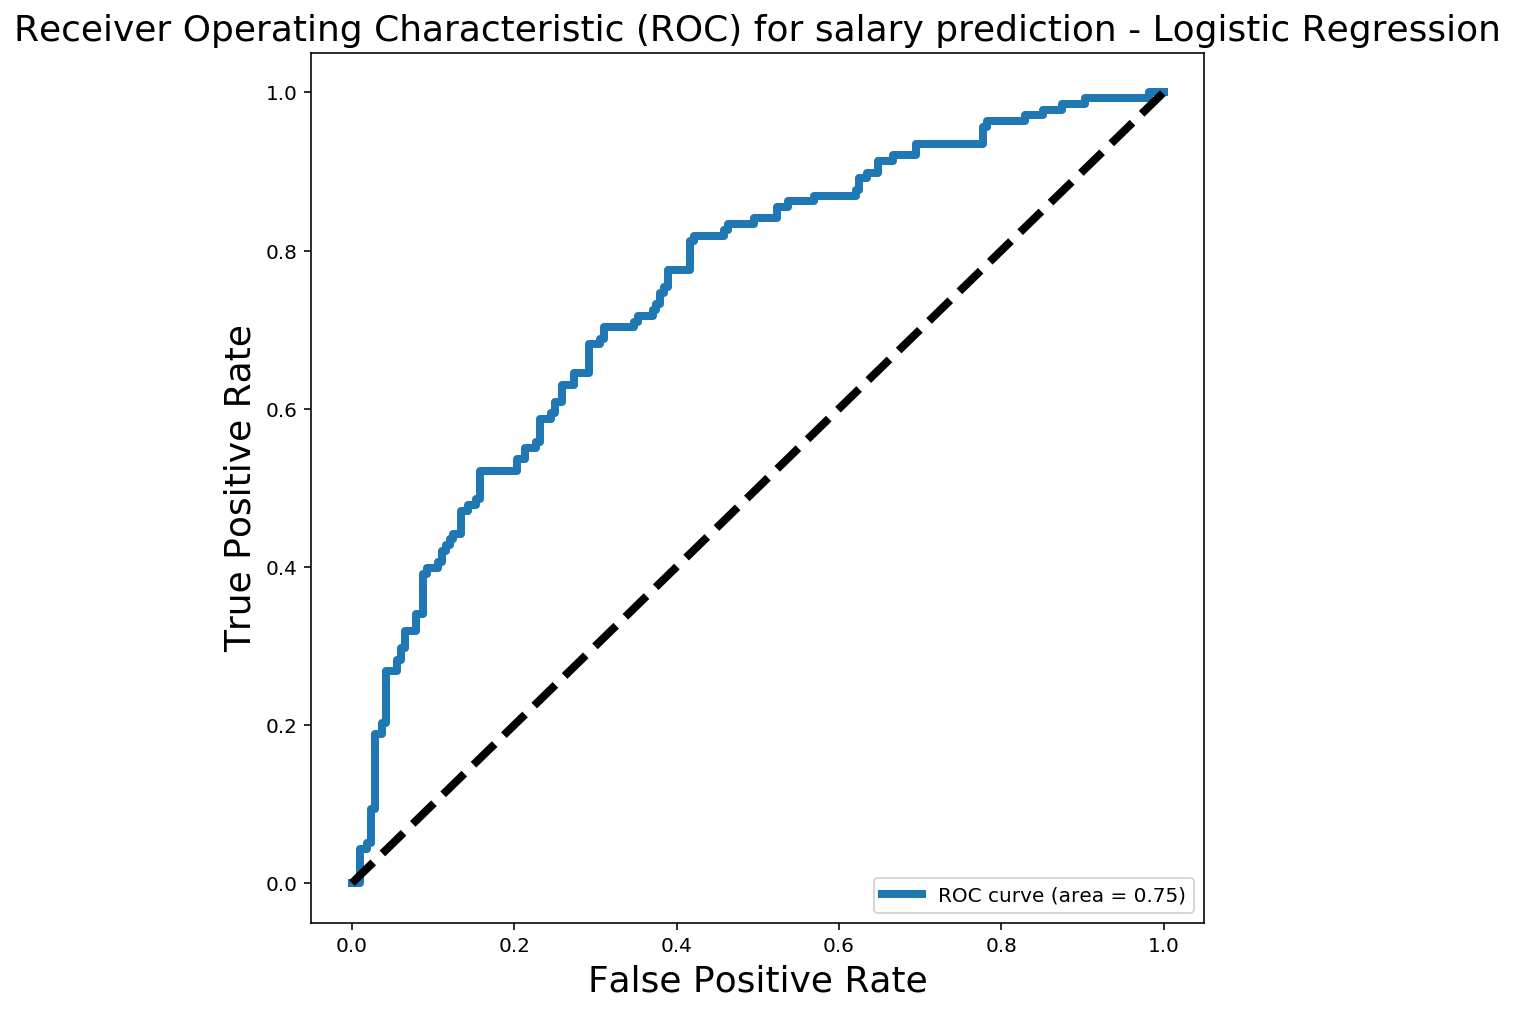

In [199]:
logreg.fit(X_train,y_train)

yhat = logreg.predict(X_test)
yhat_pp = logreg.predict_proba(X_test)

model_evaluation(yhat,yhat_pp,"Logistic Regression")

Accuracy : 0.6751412429378532

ROC AUC Score : 0.7100275093934514

             Prediced Low Salary  Prediced High Salary
Low Salary                    53                    85
High Salary                   30                   186 

              precision    recall  f1-score   support

           0       0.69      0.86      0.76       216
           1       0.64      0.38      0.48       138

   micro avg       0.68      0.68      0.68       354
   macro avg       0.66      0.62      0.62       354
weighted avg       0.67      0.68      0.65       354
 



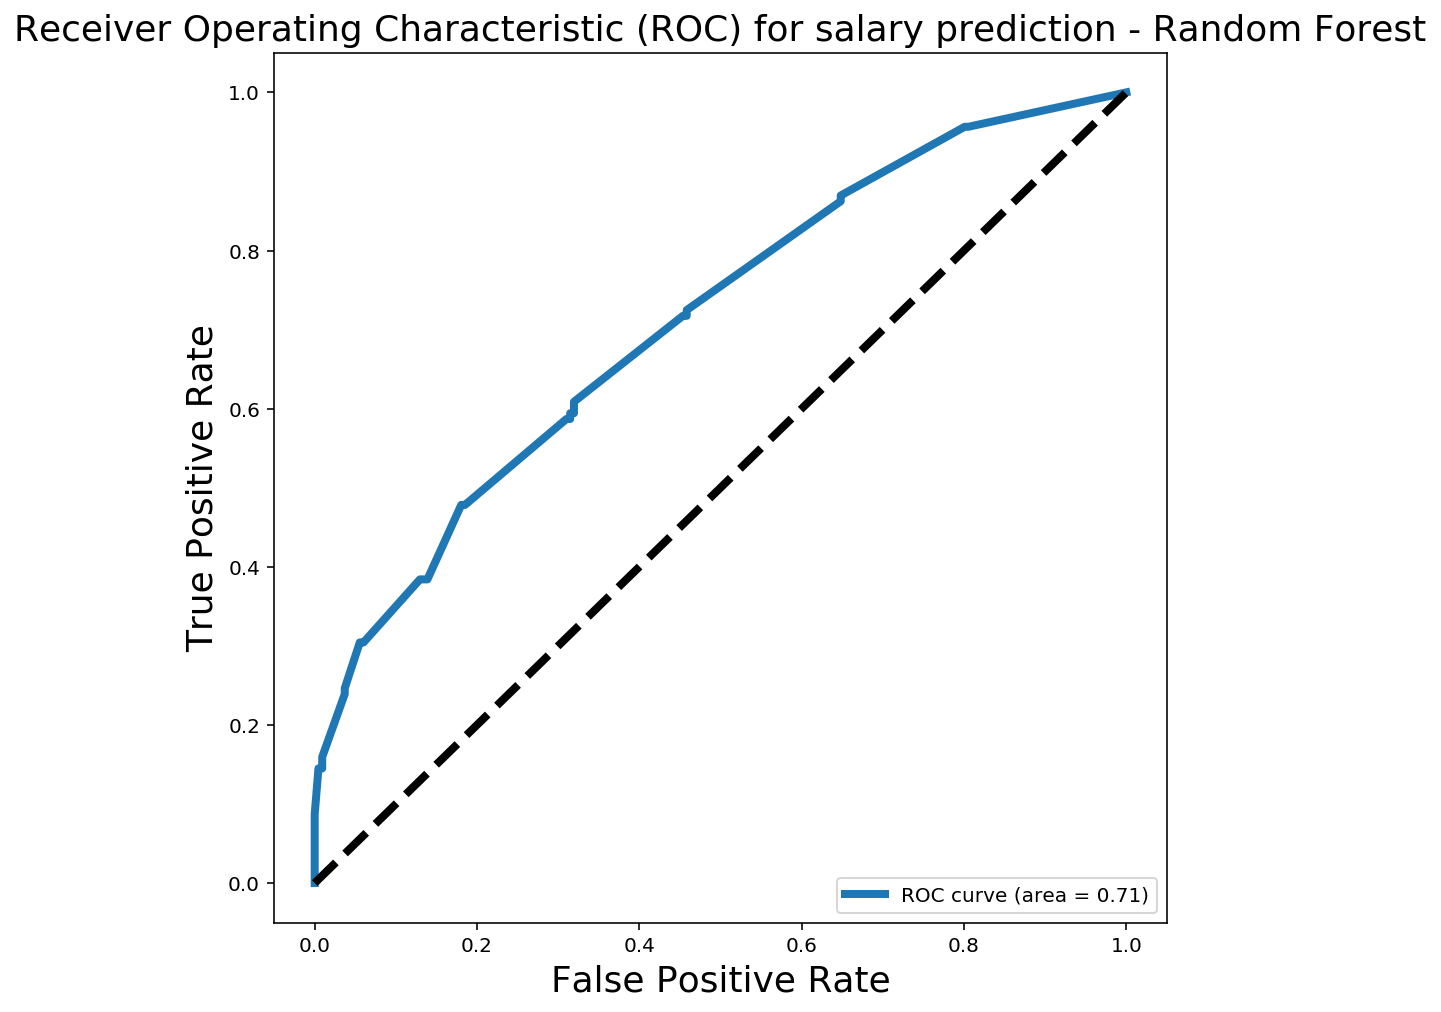

In [200]:
rfc.fit(X_train,y_train)

yhat = rfc.predict(X_test)
yhat_pp = rfc.predict_proba(X_test)

model_evaluation(yhat,yhat_pp,'Random Forest')

### 2.2.2 Tuning parameters with GridSearch for Logistic and Random Forest

In [203]:
# Logistic Regression
best_logreg_model = logreg_gridsearch(X_train,y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:  8.3min


best score:  0.7421307506053268
best parameters:  {'C': 0.0498189751920516, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator:  LogisticRegression(C=0.0498189751920516, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  8.6min finished


Logestic Regression Avg Score:  0.7300470173376432
Logestic Regression Std Score:  0.04638161396217684
Logestic Regression with gridsearch Avg Score:  0.7324272700558331
Logestic Regression with gridsearch Std Score:  0.03619575526374312


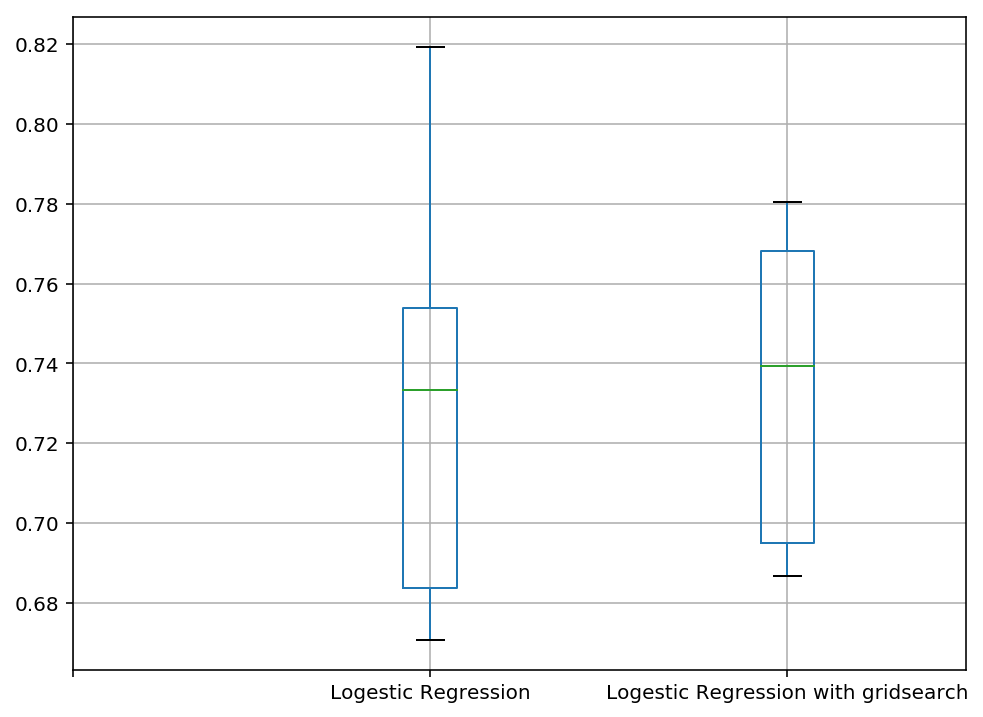

In [204]:
models_compare_result = model_comparison([logreg,best_logreg_model], 
                                         X_train, y_train, 'accuracy',
                                         'Logestic Regression',
                                         'Logestic Regression with gridsearch')
plot_models_compare_result(models_compare_result,"Logestic Regression",
                           "Logestic Regression with gridsearch")

Accuracy : 0.7033898305084746

ROC AUC Score : 0.7564076757917337

             Prediced Low Salary  Prediced High Salary
Low Salary                    66                    72
High Salary                   33                   183 

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       216
           1       0.67      0.48      0.56       138

   micro avg       0.70      0.70      0.70       354
   macro avg       0.69      0.66      0.67       354
weighted avg       0.70      0.70      0.69       354
 



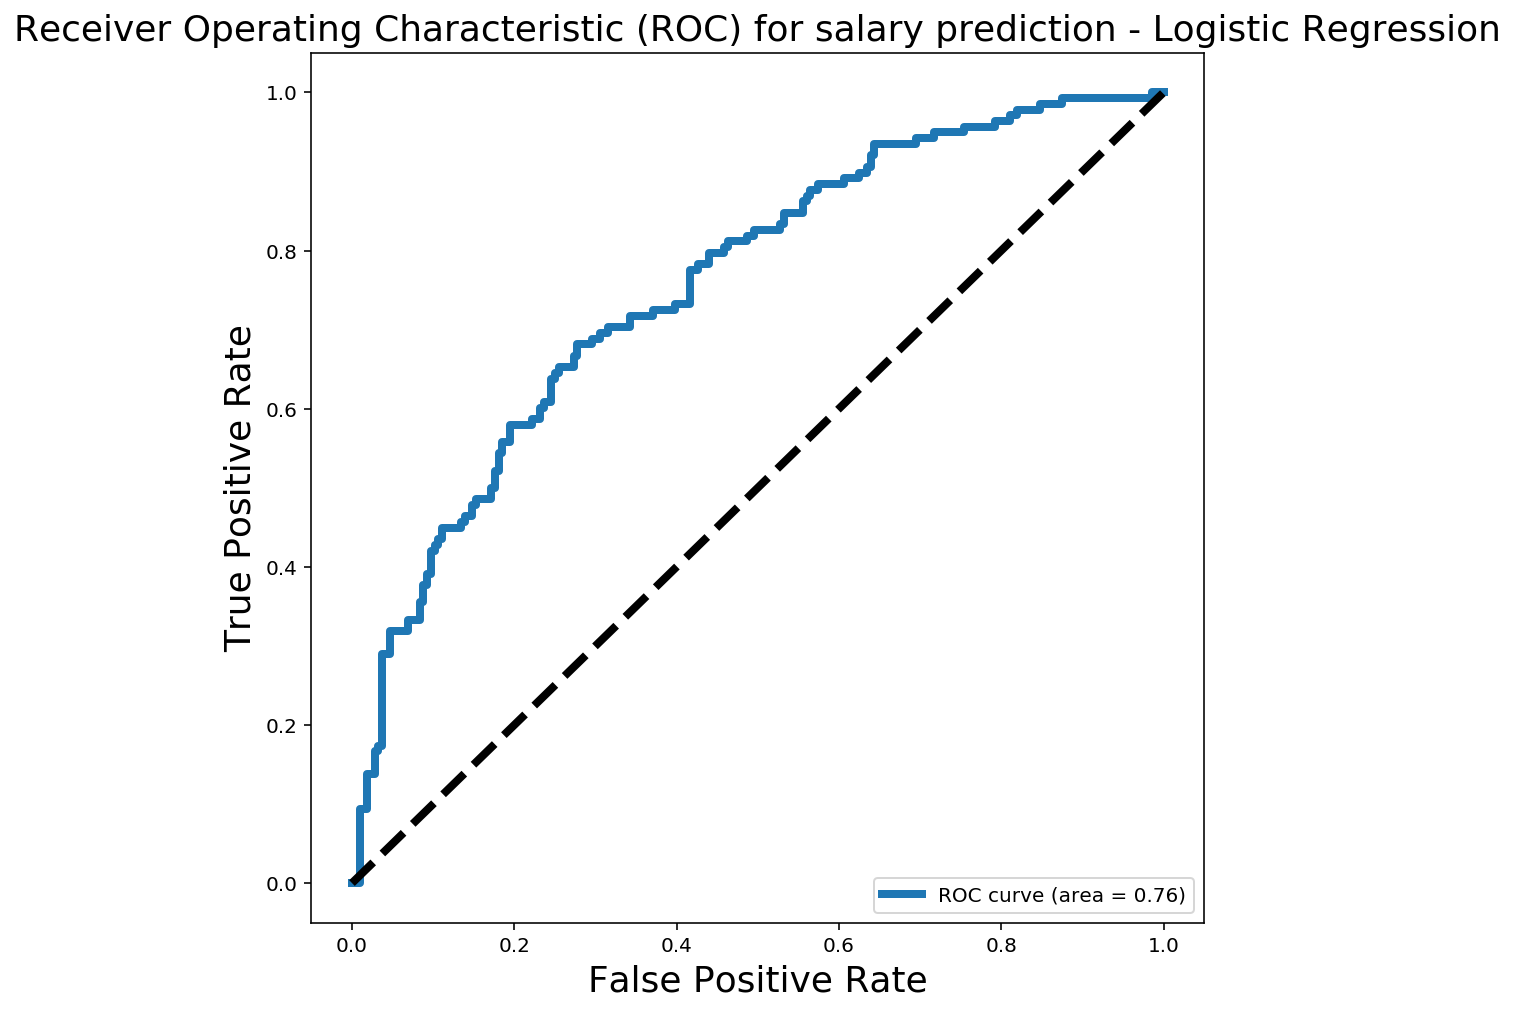

In [205]:
yhat = best_logreg_model.predict(X_test)
yhat_pp = best_logreg_model.predict_proba(X_test)

model_evaluation(yhat,yhat_pp,"Logistic Regression")

In [208]:
# Random Forest
best_rfc_model = rfc_gridsearch(X_train,y_train)

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed: 38.3min finished


best score:  0.7021791767554479
best parameters:  {'min_samples_split': 3, 'n_estimators': 200}
best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Random Forest Avg Score:  0.6660005877167205
Random Forest Std Score:  0.0541103207490584
Random Forest with gridsearch Avg Score:  0.6888921539817807
Random Forest with gridsearch Std Score:  0.03443665177761554


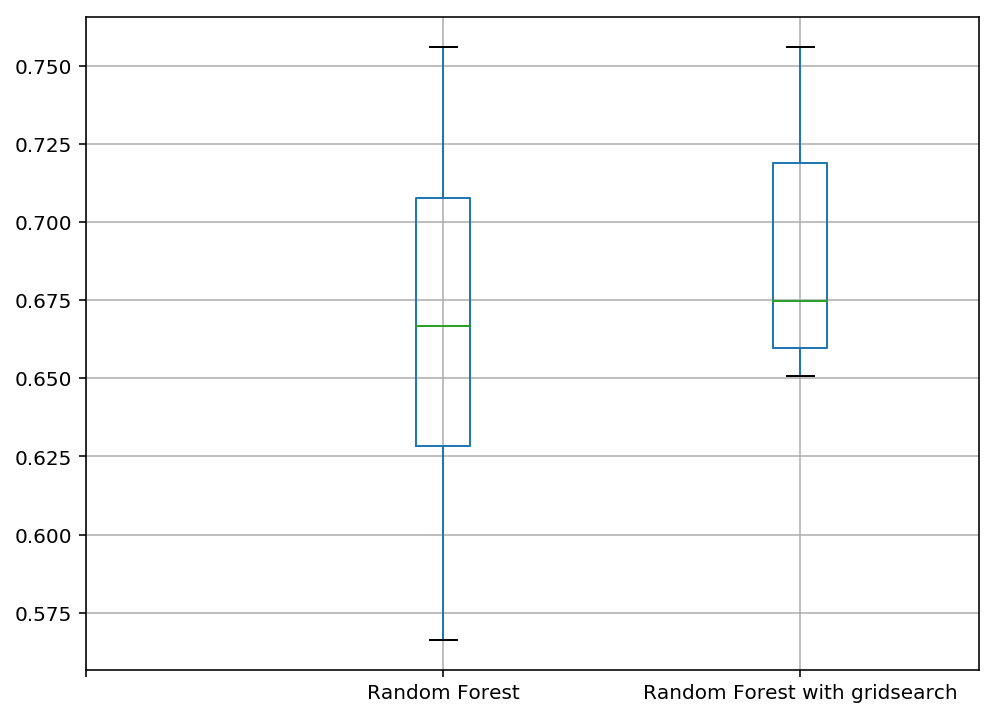

In [209]:
models_compare_result = model_comparison([rfc,best_rfc_model], 
                                         X_train, y_train, 'accuracy',
                                         'Random Forest',
                                         'Random Forest with gridsearch')
plot_models_compare_result(models_compare_result,"Random Forest",
                           "Random Forest with gridsearch")

Accuracy : 0.6779661016949152

ROC AUC Score : 0.7471651905528718

             Prediced Low Salary  Prediced High Salary
Low Salary                    49                    89
High Salary                   25                   191 

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       216
           1       0.66      0.36      0.46       138

   micro avg       0.68      0.68      0.68       354
   macro avg       0.67      0.62      0.62       354
weighted avg       0.67      0.68      0.65       354
 



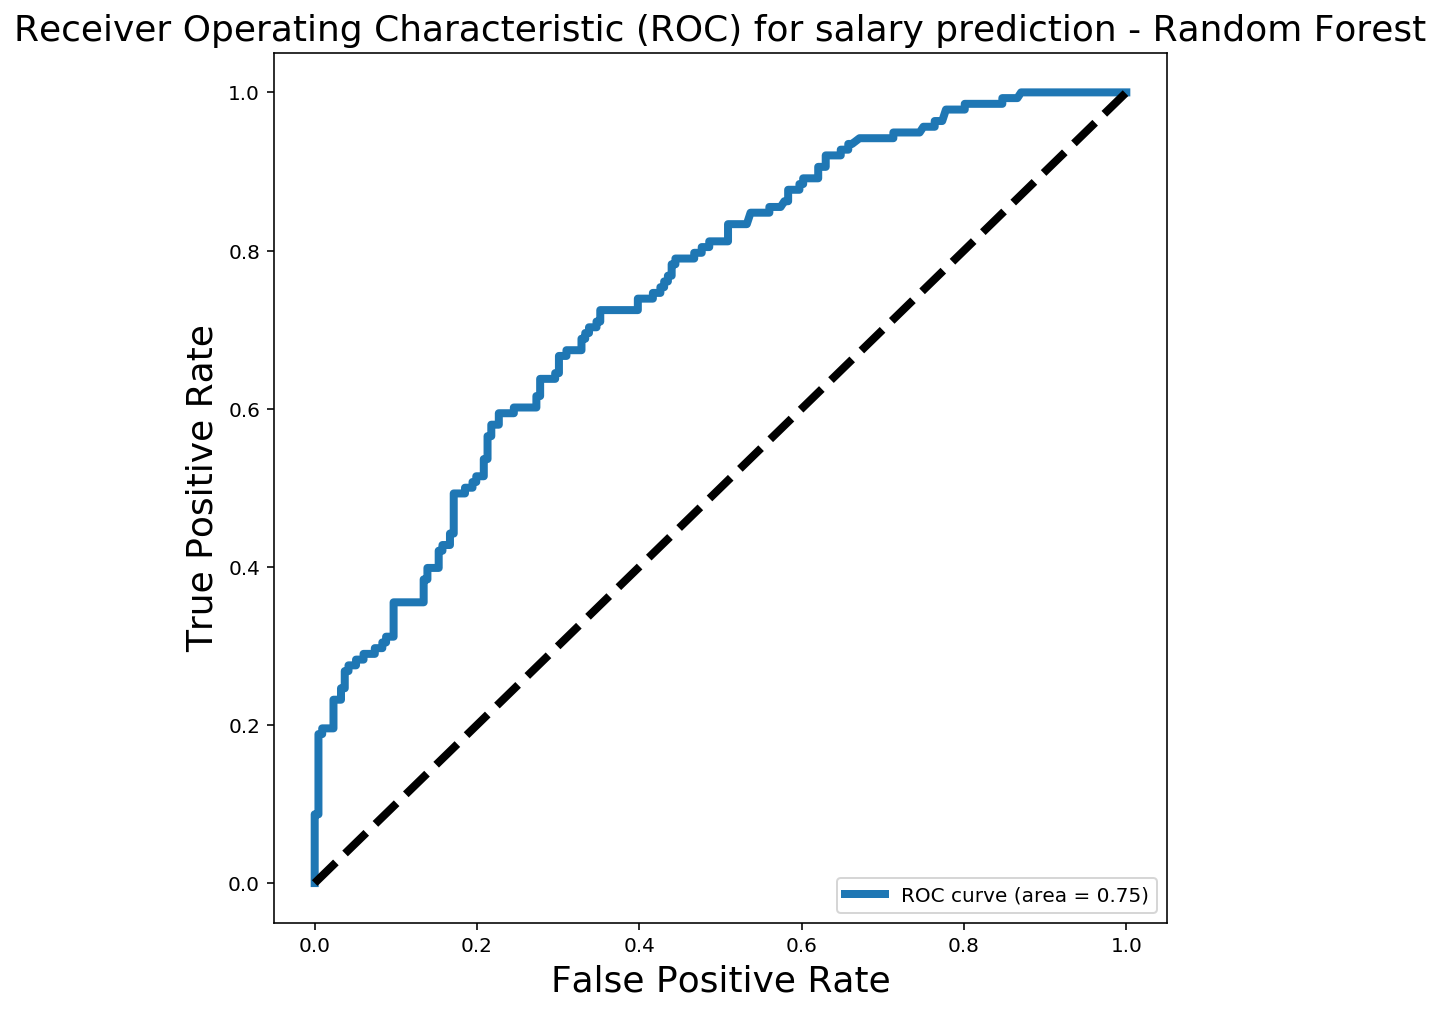

In [210]:
yhat = best_rfc_model.predict(X_test)
yhat_pp = best_rfc_model.predict_proba(X_test)

model_evaluation(yhat,yhat_pp,"Random Forest")

### 2.2.3 Adding Description as Features

In [273]:
# Setting Features and target
X_desc = pd.concat([requirement_df,description_df],axis=1)
y_desc = df.Senior_Junior

# Splitting data into train and test
X_train_desc, X_test_desc, y_train_desc, y_test_desc = train_test_split(X_desc, y_desc, 
                                                              test_size=0.3, 
                                                              random_state=24)


In [274]:
# trying SelectKBest for selecting Features
X_desc_new = SelectKBest(chi2, k=20).fit(X_desc, y_desc)
X_desc_new.scores_

array([3.75097580e+00, 1.14375000e+01, 3.39840388e+01, ...,
       8.78220141e-03, 8.78220141e-03, 8.78220141e-03])

In [275]:
df_scores = pd.DataFrame(X_desc_new.scores_)
df_columns = pd.DataFrame(X_desc.columns)
#concat two dataframes for better visualization 
feature_Scores = pd.concat([df_columns,df_scores],axis=1)
feature_Scores.columns = ['Industry factors','Score']  #naming the dataframe columns
print(feature_Scores.nlargest(20,'Score'))  #print 10 best features

            Industry factors       Score
10875                manager  155.944769
11733           organisation  144.002060
2918              management  105.817718
2911                  manage   95.766850
6141                approach   92.131440
13006               research   91.985844
3864                 project   91.214549
14756              tookitaki   84.964286
1478                 develop   80.940817
3782              production   80.330584
12809         reconciliation   78.096539
12866  regulatory compliance   78.010943
12865             regulatory   74.114835
1869                evaluate   71.105352
5430               workplace   69.681323
8063                delivery   69.494206
10862       management suite   66.991071
3757                 process   63.317858
2759                    lead   62.884117
2972           manufacturing   55.904274


In [217]:
# With GridSearch
best_logreg_model_desc = logreg_gridsearch(X_train_desc,y_train_desc)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 10000 out of 1000

best score:  0.7433414043583535
best parameters:  {'C': 0.03992109129748051, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator:  LogisticRegression(C=0.03992109129748051, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


Accuracy : 0.7401129943502824

ROC AUC Score : 0.7720746108427268

             Prediced Low Salary  Prediced High Salary
Low Salary                    74                    64
High Salary                   28                   188 

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       216
           1       0.73      0.54      0.62       138

   micro avg       0.74      0.74      0.74       354
   macro avg       0.74      0.70      0.71       354
weighted avg       0.74      0.74      0.73       354
 



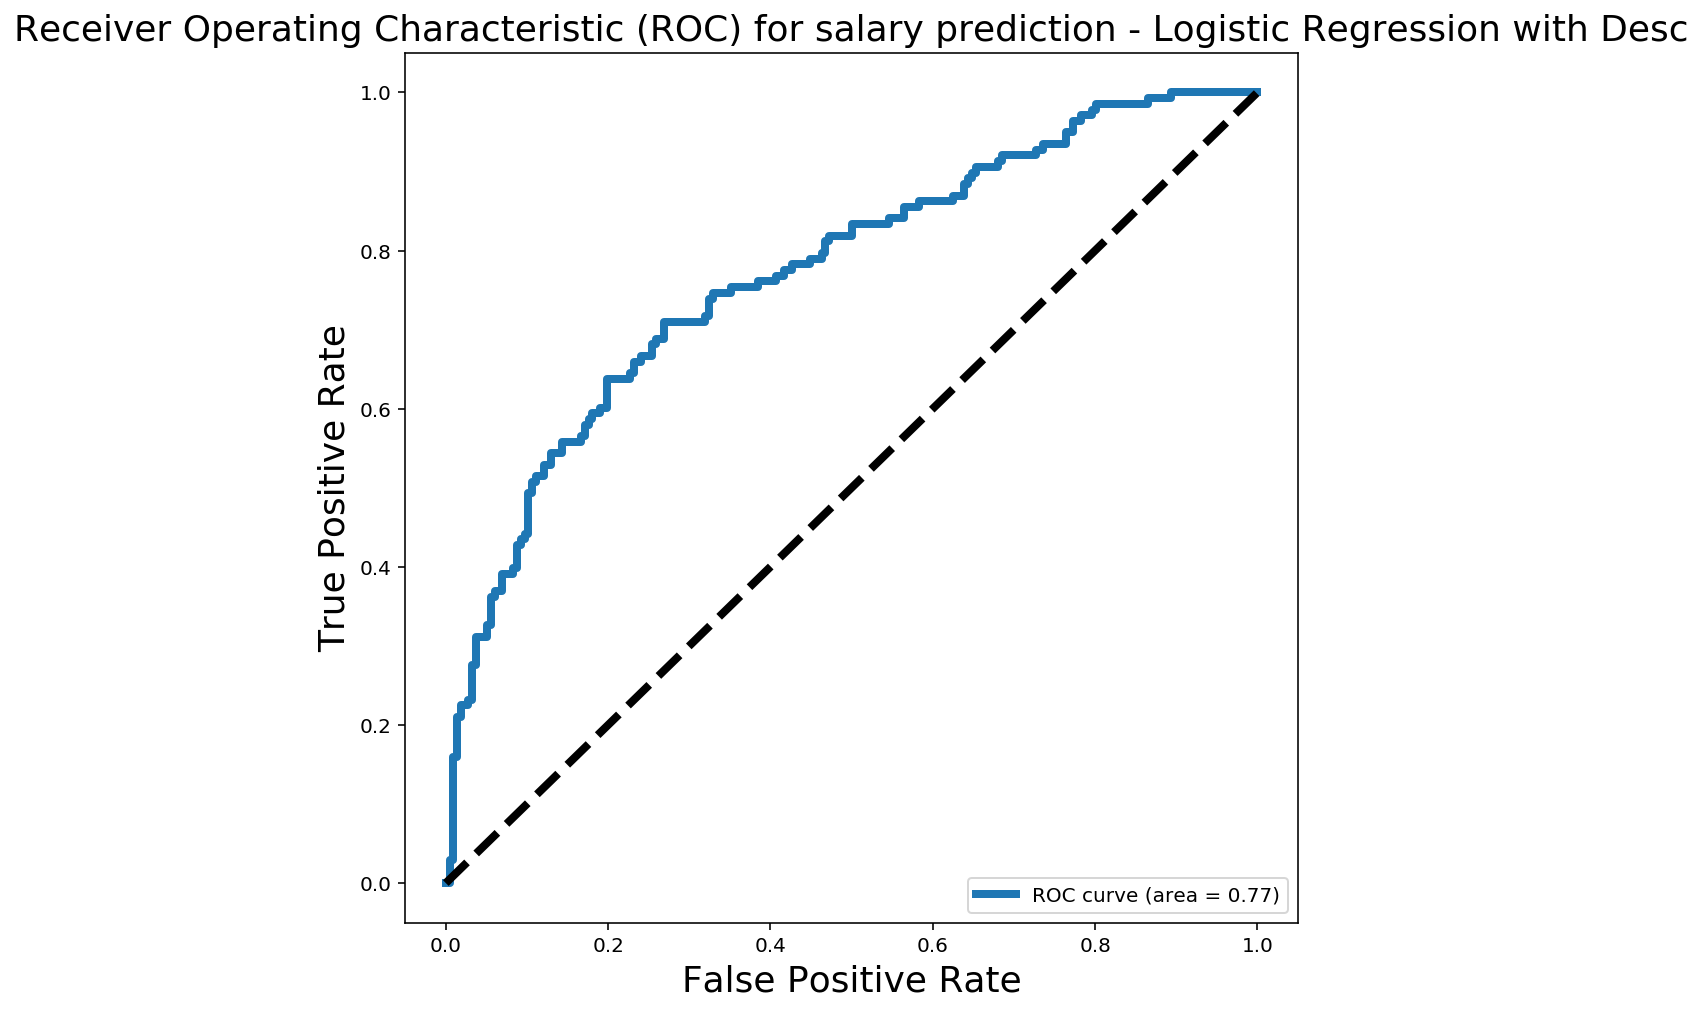

In [218]:
yhat = best_logreg_model_desc.predict(X_test_desc)
yhat_pp = best_logreg_model_desc.predict_proba(X_test_desc)

model_evaluation(yhat,yhat_pp,"Logistic Regression with Desc")

In [219]:
# With GridSearch
best_rfc_model_desc = rfc_gridsearch(X_train_desc,y_train_desc)

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed: 12.9min finished


best score:  0.7179176755447942
best parameters:  {'min_samples_split': 2, 'n_estimators': 900}
best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Accuracy : 0.711864406779661

ROC AUC Score : 0.7801429146537842

             Prediced Low Salary  Prediced High Salary
Low Salary                    60                    78
High Salary                   24                   192 

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       216
           1       0.71      0.43      0.54       138

   micro avg       0.71      0.71      0.71       354
   macro avg       0.71      0.66      0.67       354
weighted avg       0.71      0.71      0.69       354
 



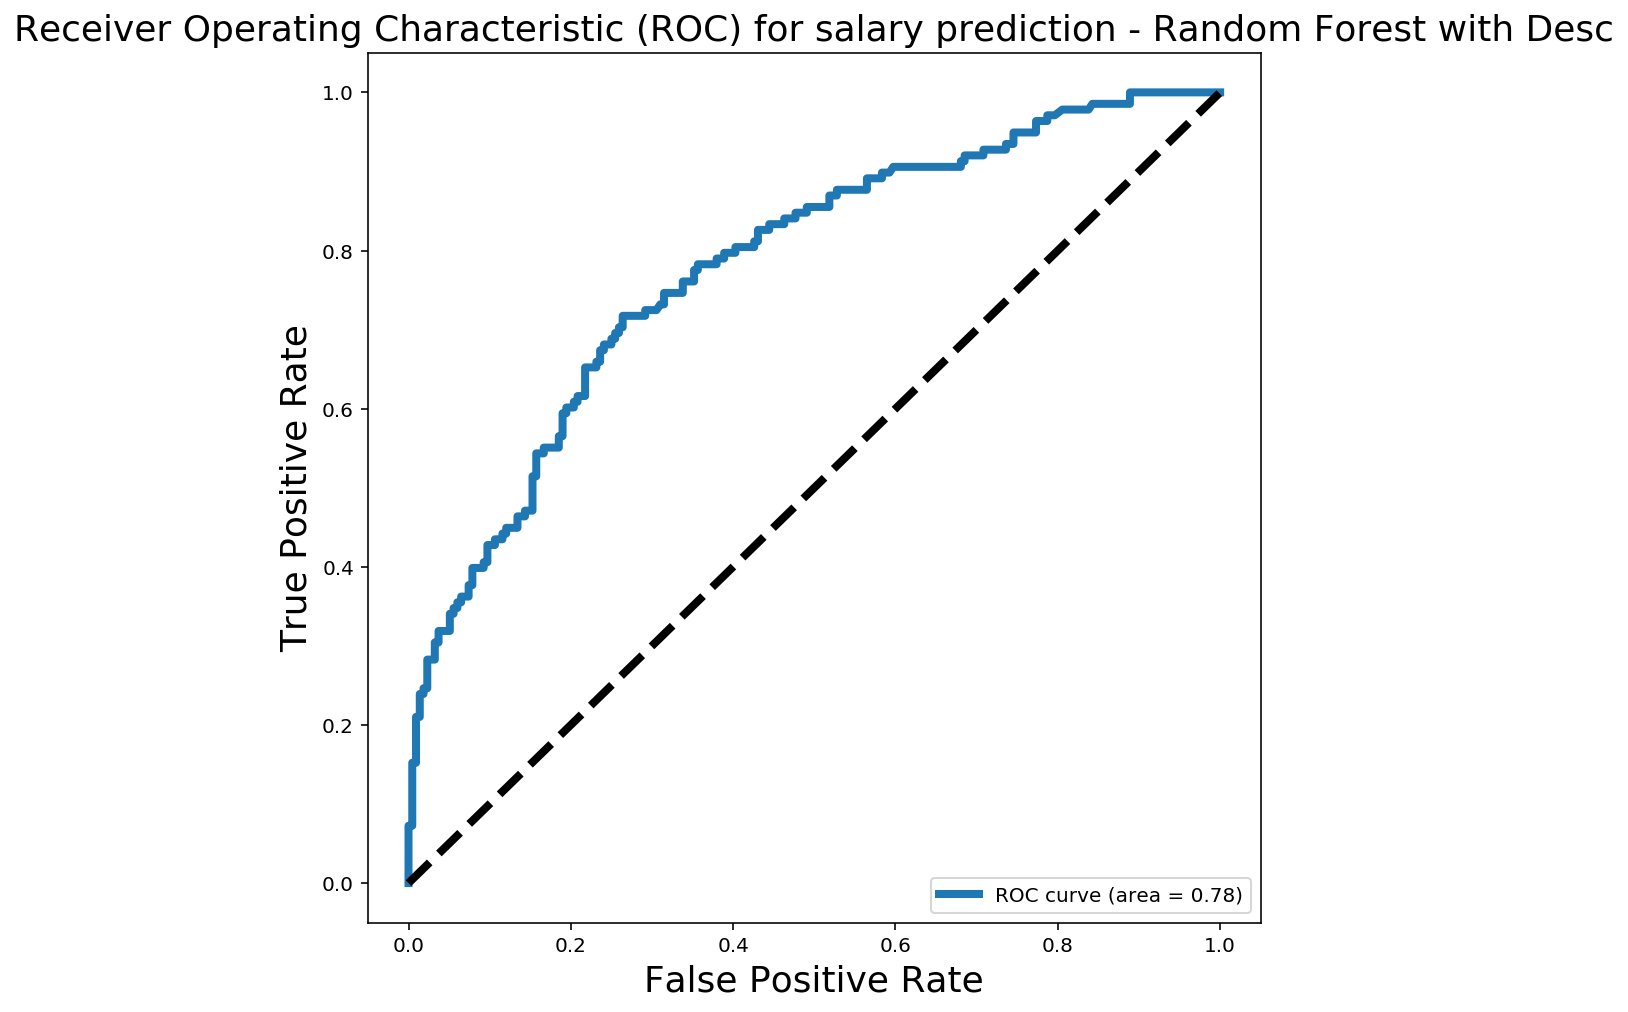

In [220]:
yhat = best_rfc_model_desc.predict(X_test_desc)
yhat_pp = best_rfc_model_desc.predict_proba(X_test_desc)

model_evaluation(yhat,yhat_pp,'Random Forest with Desc')

In [222]:
# Features Decision

features_importance_df = pd.DataFrame({'Features': X_desc.columns,
                                       'coef': best_logreg_model_desc.coef_[0], 
                                       'abs_coef': abs(best_logreg_model_desc.coef_[0])})
features_importance_df.head()

,Features,coef,abs_coef
0,03,0.007348,0.007348
1,07c5639,0.025925,0.025925
2,10,0.094344,0.094344
3,10 years,0.069800,0.069800
4,11,-0.015408,0.015408


In [223]:
features_importance_df.sort_values('coef',ascending=False).head(10)

,Features,coef,abs_coef
10875,manager,0.162664,0.162664
10052,information,0.161199,0.161199
11027,media,0.160948,0.160948
10529,lead,0.155251,0.155251
14526,technology,0.142307,0.142307
2918,management,0.140941,0.140941
2759,lead,0.137369,0.137369
14079,strong,0.134537,0.134537
14056,strategy,0.128728,0.128728
3864,project,0.125495,0.125495


In [224]:
features_importance_df.sort_values('abs_coef',ascending=False).head(10)

,Features,coef,abs_coef
3926,python,-0.224571,0.224571
12140,position,-0.206057,0.206057
13006,research,-0.196150,0.196150
6979,clients,-0.185482,0.185482
987,computer,-0.179269,0.179269
5718,activities,-0.166715,0.166715
10875,manager,0.162664,0.162664
10052,information,0.161199,0.161199
11027,media,0.160948,0.160948
10529,lead,0.155251,0.155251


In [229]:
features_importance_df[features_importance_df.Features.str.contains('requirements')]\
                        .sort_values('coef', ascending = False).head(15)
                                                                         

,Features,coef,abs_coef
7631,customer requirements,0.069021,0.069021
12976,requirements,0.067506,0.067506
12992,requirements perform,0.043640,0.043640
12982,requirements design,0.041725,0.041725
1260,data requirements,0.031790,0.031790
12391,product requirements,0.031122,0.031122
15018,user requirements,0.029576,0.029576
14461,technical requirements,0.029369,0.029369
13001,requirements specifications,0.028136,0.028136
4976,technical requirements,0.027894,0.027894


In [228]:
features_importance_df[features_importance_df.Features.str.contains('requirements')]\
                        .sort_values('coef', ascending = True).head(15)
                                                                                                     

,Features,coef,abs_coef
650,business requirements,-0.044717,0.044717
7853,data requirements,-0.036420,0.036420
13965,stakeholders requirements,-0.030829,0.030829
4155,requirements bachelor,-0.022412,0.022412
12980,requirements business,-0.020856,0.020856
9431,gather requirements,-0.020810,0.020810
11067,meet requirements,-0.020451,0.020451
12985,requirements document,-0.020194,0.020194
4161,requirements gathering,-0.015731,0.015731
13002,requirements support,-0.012630,0.012630


In [226]:
features_importance_df[features_importance_df.Features.str.contains('requirements')]\
                        .sort_values('abs_coef', ascending = False).head(15)
                                                                                                     

,Features,coef,abs_coef
7631,customer requirements,0.069021,0.069021
12976,requirements,0.067506,0.067506
650,business requirements,-0.044717,0.044717
12992,requirements perform,0.043640,0.043640
12982,requirements design,0.041725,0.041725
7853,data requirements,-0.036420,0.036420
1260,data requirements,0.031790,0.031790
12391,product requirements,0.031122,0.031122
13965,stakeholders requirements,-0.030829,0.030829
15018,user requirements,0.029576,0.029576


Conclusion for Question 2:<br>
Requirement and Description of the job are used for determining senior or junior roles. The keywords are lead, strategy in project, management for senior positions and on the other hand, education of bachelor, stakeholders and busniness requirements such as research and activiites, data requirements sucha as python etc. are more likely for junior roles. 

### 2.2.4 Oversampling

In [230]:
from imblearn.over_sampling import SMOTE

In [231]:
sm=SMOTE(random_state=42)

In [232]:
X_train_smote, y_train_smote = sm.fit_sample(X_train,y_train)

In [233]:
X_train_smote.shape

(1032, 9829)

In [235]:
# With GridSearch
best_logreg_model_smote = logreg_gridsearch(X_train_smote,y_train_smote)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 12.6min


best score:  0.7868217054263565
best parameters:  {'C': 0.1507845045861051, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator:  LogisticRegression(C=0.1507845045861051, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed: 12.9min finished
/Users/nandar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy : 0.6977401129943502

ROC AUC Score : 0.735071121846484

             Prediced Low Salary  Prediced High Salary
Low Salary                    79                    59
High Salary                   48                   168 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       216
           1       0.62      0.57      0.60       138

   micro avg       0.70      0.70      0.70       354
   macro avg       0.68      0.68      0.68       354
weighted avg       0.69      0.70      0.70       354
 



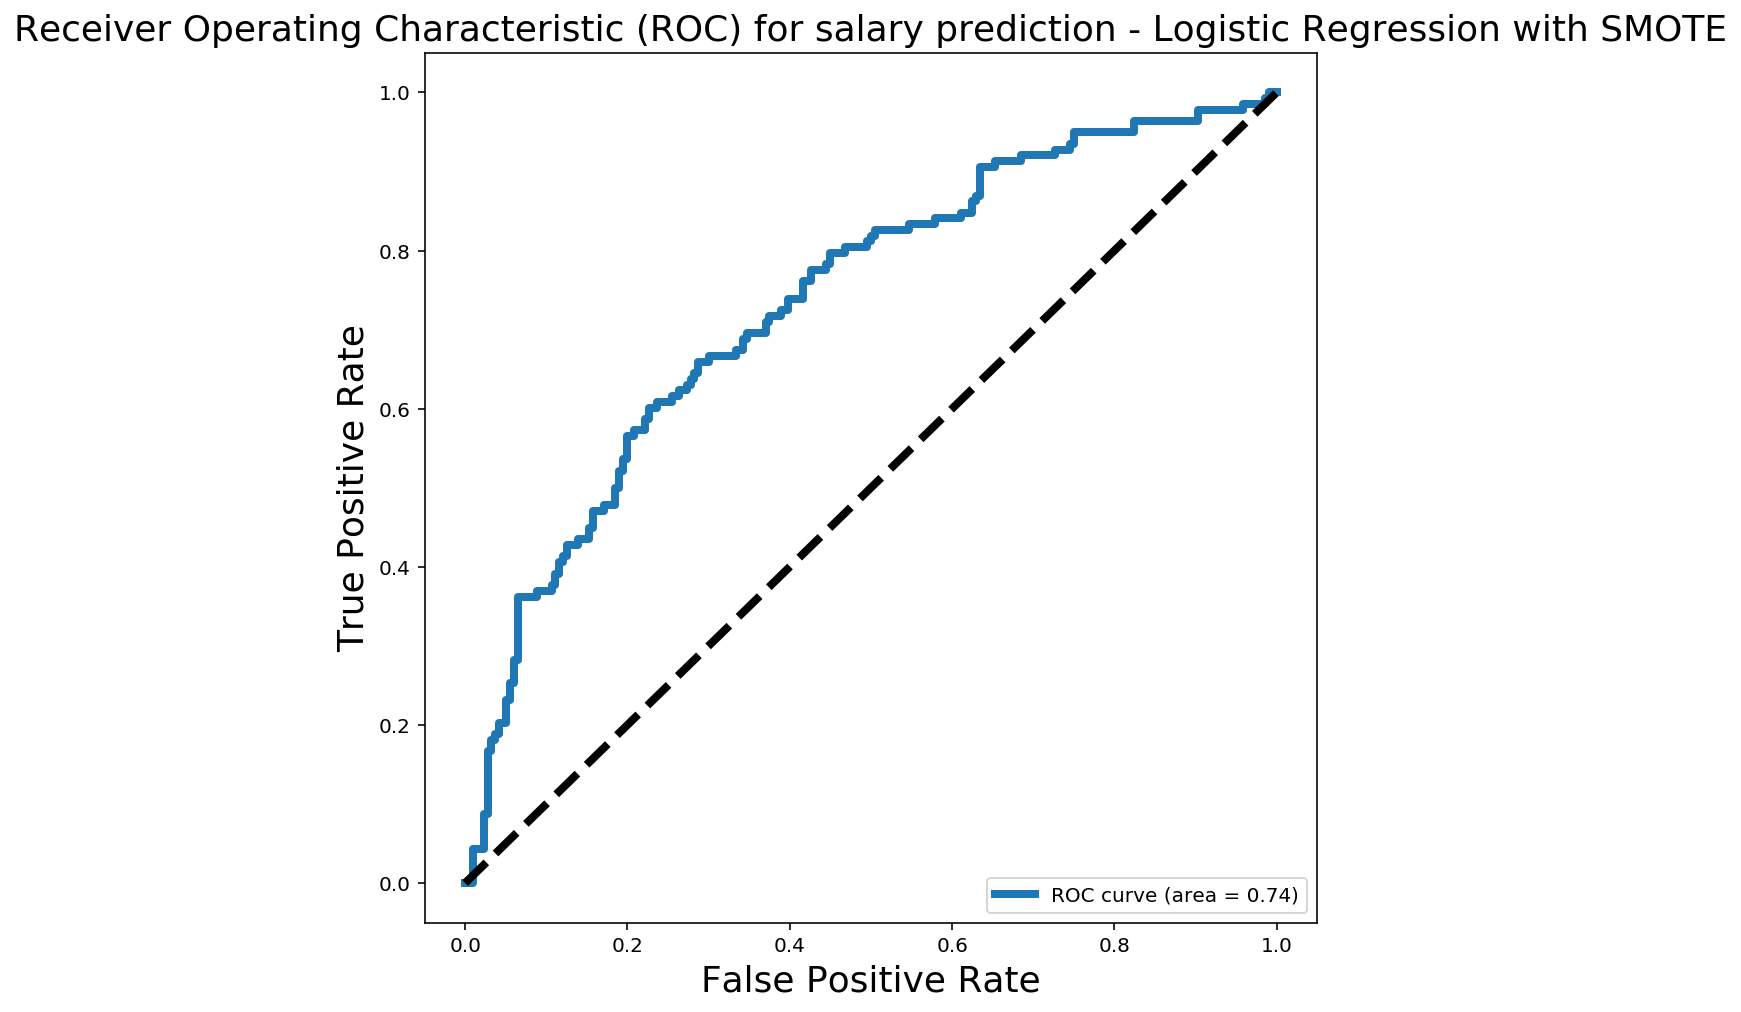

In [239]:
yhat = best_logreg_model_smote.predict(X_test)
yhat_pp = best_logreg_model_smote.predict_proba(X_test)

model_evaluation(yhat,yhat_pp,"Logistic Regression with SMOTE")

In [242]:
# Features Decision

SMOTE_features_importance_df = pd.DataFrame({'Features': X.columns,
                                       'coef': best_logreg_model_smote.coef_[0], 
                                       'abs_coef': abs(best_logreg_model_smote.coef_[0])})
SMOTE_features_importance_df.head()

,Features,coef,abs_coef
0,10,-0.012200,0.012200
1,10 years,0.000048,0.000048
2,100,-0.017675,0.017675
3,100 million,0.018714,0.018714
4,100 million monthly,0.015289,0.015289


In [243]:
SMOTE_features_importance_df.sort_values('coef',ascending=False).head(10)

,Features,coef,abs_coef
5484,media,0.384972,0.384972
1504,code,0.322066,0.322066
4986,lead,0.308308,0.308308
8513,strategy,0.305694,0.305694
8983,technology,0.302927,0.302927
3018,education,0.292211,0.292211
1420,client,0.287721,0.287721
8536,strong,0.286197,0.286197
775,audience,0.284347,0.284347
3025,effective,0.281654,0.281654


In [244]:
SMOTE_features_importance_df.sort_values('abs_coef',ascending=False).head(10)

,Features,coef,abs_coef
6597,position,-0.453249,0.453249
5484,media,0.384972,0.384972
6742,problems,-0.383652,0.383652
7399,reports,-0.374600,0.374600
2159,data analyst,-0.362719,0.362719
1629,communication,-0.362387,0.362387
6940,programming,-0.356371,0.356371
9252,trading,-0.354851,0.354851
3154,engineer,-0.341306,0.341306
1097,building,-0.327898,0.327898


In [245]:
SMOTE_features_importance_df[SMOTE_features_importance_df.Features.str.contains('requirements')]\
                        .sort_values('coef', ascending = False).head(15)


,Features,coef,abs_coef
2088,customer requirements,0.181336,0.181336
7433,requirements,0.111158,0.111158
7439,requirements design,0.099300,0.099300
6848,product requirements,0.078963,0.078963
7458,requirements specifications,0.068713,0.068713
7449,requirements perform,0.066838,0.066838
447,analysis requirements,0.065826,0.065826
9475,user requirements,0.065742,0.065742
7448,requirements new,0.065403,0.065403
7446,requirements gathering,0.062851,0.062851


In [246]:
SMOTE_features_importance_df[SMOTE_features_importance_df.Features.str.contains('requirements')]\
                        .sort_values('abs_coef', ascending = False).head(15)


,Features,coef,abs_coef
2310,data requirements,-0.181583,0.181583
2088,customer requirements,0.181336,0.181336
7433,requirements,0.111158,0.111158
7439,requirements design,0.099300,0.099300
3888,gather requirements,-0.085444,0.085444
8422,stakeholders requirements,-0.084040,0.084040
7437,requirements business,-0.080017,0.080017
7442,requirements document,-0.079542,0.079542
6848,product requirements,0.078963,0.078963
7458,requirements specifications,0.068713,0.068713


In [247]:
# Even using SMOTE to upsample, the accuracy and ROC AUC score are getting lower. 
# However, the features importance is almost the same.
# Therefore, in this case, upsampling is not required.

## Summary:

<u>Objectives</u><br>
There are two objectives in this Web Scraping Job Postings Project.
- 1. Finding the factors that impact salary
- 2. Finding the factors that distinguish job category (in this case, features which are important for distinguishing junior vs. senior positions

<u>Background of Dataset</u><br>
Firstly, all the required data was acquired from scrapping https://www.mycareersfuture.sg/ and there are 4735 job postings retrieved on the day scrapping was processed (08.05.19). Out of these 4735, only 1180 are filtered which are related to Data related jobs such as Data Science, Data Analysis, Data Engineer, etc. 

<u>Finding what impact salary</u><br>
To find what impact on high or low salary, Seniority, Requirement, Description of the job are used to observe which keywords are affecting on salary. In the process, the program breaks down the words into one word and 2 words from a chunk of sentences in requirement and description fields. After analysis is done through modelling, it found out that experience such as 23 years, 10 years, etc. and qualification such as degree, msc., phd., etc. are the main factors to decide high pay job or not. Other factors such as technical requirements(e.g. Python, Excel, Machine Learning) and nontechnical requirements (e.g. personality skills) are also supporting factors in deciding high or low pay job.

<u>Finding what distinguish job category</u><br>
To find what impact on high or low salary, Seniority, Requirement, Description of the job are used to observe which keywords are affecting on salary. As mentioned above, since salary range is quite large, only minimum salary is used for deciding impact on salary. Median of minimum salary is used for cutoff in separating high pay and low pay since there are higher pay outliers in dataset. In the process, the program breaks down the words into one word and 2 words from a chunk of sentences in requirement and description fields. After analysis is done through modelling, it found out that experience like  10 years, and so on and qualification such as degree, msc., phd., etc. are the main factors to decide high pay job or not. Other factors such as business and technical requirements(e.g. Python, Excel, Machine Learning) and nontechnical requirements (e.g. personality skills) are also supporting factors in deciding high or low pay job. Some indicative of low pay are Fresh/Entry level and on the other hand, Senior Management, Manager, Senior Executive, experienced person, etc. are strong indicator of high pay. 

In conclusion, the key factors that deciding higher or lower pay jobs are as following:
- Years of experience
- Seniority (entry level or manager)
- Qualification
- Technical requirement
- Nontechnical requirement (soft skill)


<u>Finding what distinguish senior or junior positions</u><br>
For deciding senior or junior positions, job requirement and its description are used for determining senior or junior roles. The keywords are lead, strategy in project and management for senior positions. On the other hand, education (especially bachelor), stakeholders and business requirements such as research and activities, data requirements such as python etc. are more likely for junior roles. In general, requirements such as gather, support and document are definitely not for senior roles.

In conclusion, the key requirement that companies look for  when hiring for Senior role are as following: 
- Leadership skills
- Management skills
- High education (more than bachelor)

<u>Limitation</u><br>
Require to try more different models and different method of text analysis and optimization to get better accurate keywords.

This job postings are only from one website called My Career Future since it provides salary range. Therefore, this salary observation is only limited to Singapore and can’t apply to other country. Year of experience is not included yet in question 2 yet.

<u>Risks</u><br>
It takes certain amont of time to run for tuning the hyperparameters with gridsearch. This project still has a lot of rooms to improve in this project such as selecting the features by using SelectKBest or PCA to reduce computational time and pipeline to arrange the code better.

